# Análisis Exploratorio de los Datos (EDA)

Librerias a utilizar

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import requests

warnings.filterwarnings('ignore')
sns.set()

In [8]:
def get_url(url):
    api_key = '7rzbGLPyLBX5oegA957IyPUBmjp7ixTlxO04Ql0t'
    url = url.replace('YOUR_API_KEY',api_key)
    return url

In [9]:
response = requests.get(get_url('http://api.datosabiertos.enacom.gob.ar/api/v2/visualizations/PENET-DE-INTER-FIJO-57760/?auth_key=YOUR_API_KEY'))
response.json()

{'result': None,
 'status': 3,
 'endpoint': None,
 'description': 'Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia',
 'parameters': [],
 'tags': ['internet', 'banda ancha', 'penetración'],
 'last_revision_id': 50976,
 'timestamp': None,
 'created_at': '2020-12-22T19:34:37Z',
 'title': 'Penetración de Internet fijo (accesos por cada 100 hogares)',
 'modified_at': '2023-03-21T17:15:43Z',
 'category_id': 79257,
 'methods': None,
 'sources': [],
 'total_revisions': 5,
 'frequency': None,
 'link': None,
 'user': 'nlastra',
 'status_str': None,
 'guid': 'PENET-DE-INTER-FIJO-57760',
 'category_name': 'Acceso a Internet'}

### Dataset `accesos_provincias_trimestral.csv`

In [10]:
acceso_provincias = pd.read_csv('clean_datasets/accesos_provincias_trimestral.csv')
acceso_provincias.sample(5)

id     Año  Trimestre   Provincia      ADSL  Cablemodem  \
798   20142Corrientes  2014.0        2.0  Corrientes   52883.0      8680.0   
300  2019 *3 *Mendoza  2019.0        3.0     Mendoza  148640.0     54312.0   
98     20213Catamarca  2021.0        3.0   Catamarca   18413.0     11709.0   
156      20211Mendoza  2021.0        1.0     Mendoza   91844.0     69295.0   
739   20151Santa Cruz  2015.0        1.0  Santa Cruz   16215.0      2700.0   

     Fibra óptica  Wireless  Dial up   Otros     Total  
798          31.0    1309.0     33.0   517.0   62958.0  
300        6865.0   12975.0      NaN     NaN  224337.0  
98        22331.0    1568.0      1.0  2232.0   56254.0  
156       38619.0   18332.0    615.0  7715.0  218923.0  
739         392.0    4772.0    424.0  2138.0   26641.0

In [11]:
data_acceso_provinias = acceso_provincias.groupby(by=['Provincia']).sum().sort_values(by='Total', ascending=False).reset_index()
data_acceso_provinias.head()

Provincia      Año  Trimestre        ADSL  Cablemodem  Fibra óptica  \
0     Buenos Aires  70626.0       86.0  40561026.0  64072849.0    15260042.0   
1  Capital Federal  70626.0       86.0  11742699.0  35195760.0     1378718.0   
2          Córdoba  70626.0       86.0  10711013.0  12237764.0     2168773.0   
3         Santa Fe  70626.0       86.0  10749241.0  10778378.0     1315470.0   
4       Entre Ríos  70626.0       86.0   3425188.0   2833674.0      301631.0   

    Wireless   Dial up     Otros        Total  
0  2045824.0  309864.0  871238.0  123354547.0  
1   115443.0  194616.0  395022.0   49071605.0  
2   799631.0    4279.0  257401.0   26266087.0  
3   619900.0   11548.0  340340.0   23956260.0  
4   435086.0    2436.0  180617.0    7251950.0

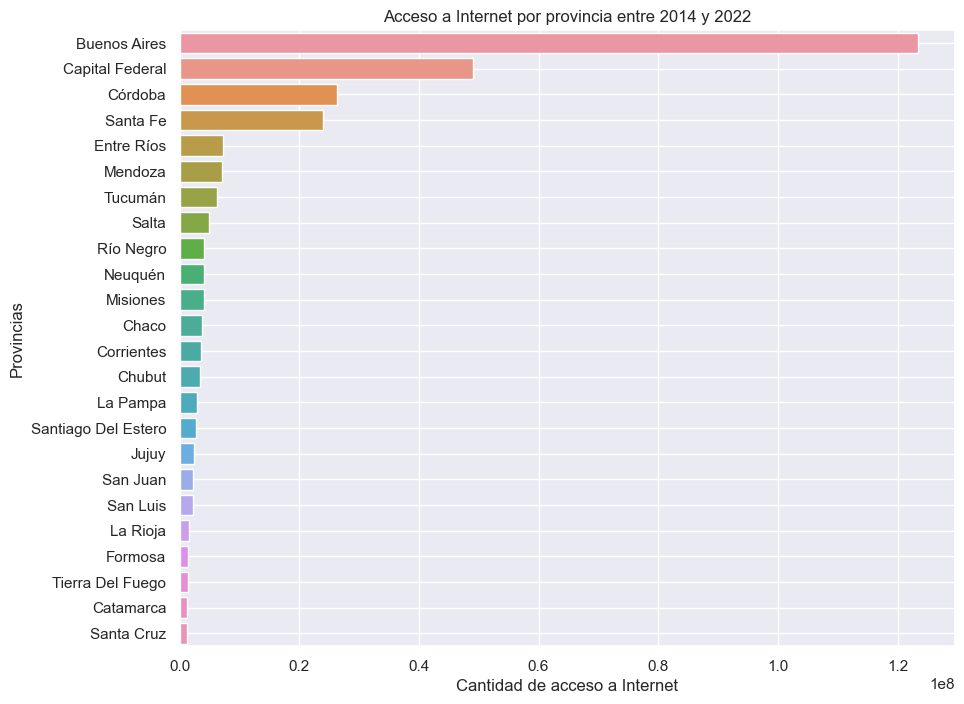

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(data= data_acceso_provinias, x='Total', y='Provincia')
plt.title('Acceso a Internet por provincia entre 2014 y 2022')
plt.xlabel('Cantidad de acceso a Internet')
plt.grid('True')
plt.ylabel('Provincias')
plt.show()

Muestro en un grafico el progreso de las 5 mejores provincias en función de la cantidad de accesos a Internet

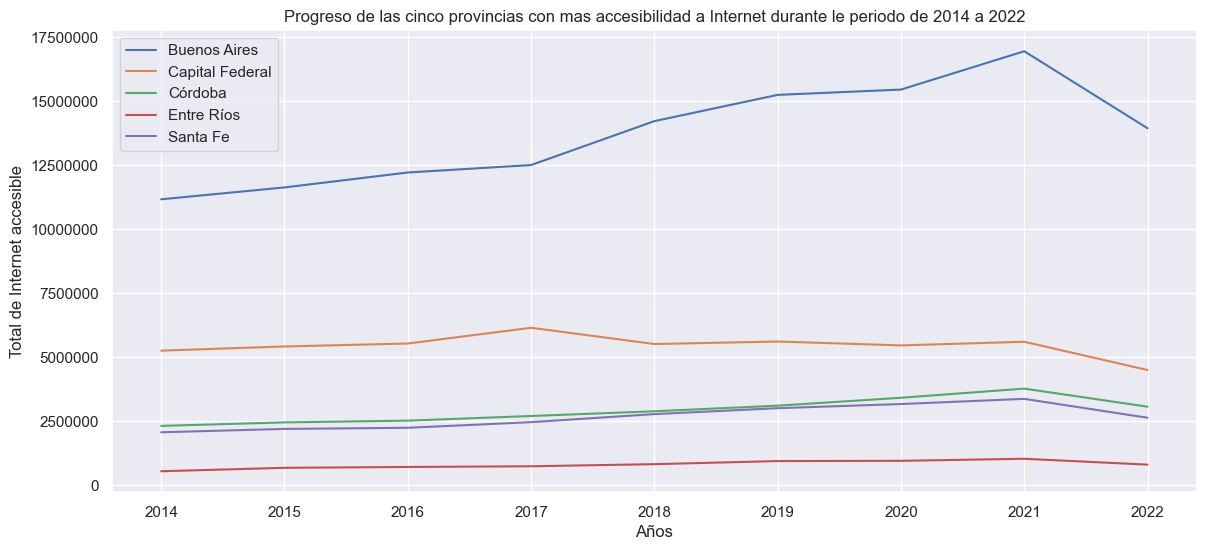

In [13]:
lista = data_acceso_provinias[:5].Provincia.unique()
d = acceso_provincias.loc[acceso_provincias.Provincia.isin(lista)].groupby(by=['Provincia','Año']).sum()
plt.figure(figsize=(14,6))
sns.lineplot(data = d, x= 'Año', y='Total', hue='Provincia')
plt.ticklabel_format(style='plain', axis='y') # Pongo el eje 'y' con valores numericos de grandes cifras
plt.grid(True)
plt.legend()
plt.title('Progreso de las cinco provincias con mas accesibilidad a Internet durante le periodo de 2014 a 2022')
plt.xlabel('Años')
plt.ylabel('Total de Internet accesible')
plt.show()

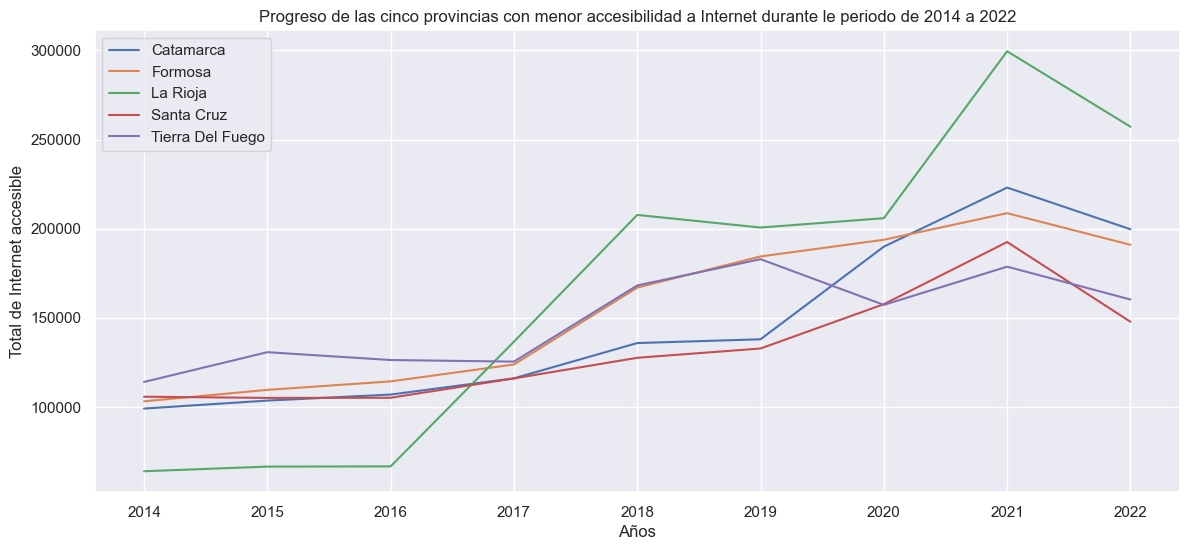

In [14]:
lista = data_acceso_provinias[-5:].Provincia.unique()
d = acceso_provincias.loc[acceso_provincias.Provincia.isin(lista)].groupby(by=['Provincia','Año']).sum()
plt.figure(figsize=(14,6))
sns.lineplot(data = d, x= 'Año', y='Total', hue='Provincia')
plt.ticklabel_format(style='plain', axis='y') # Pongo el eje 'y' con valores numericos de grandes cifras
plt.grid(True)
plt.legend()
plt.title('Progreso de las cinco provincias con menor accesibilidad a Internet durante le periodo de 2014 a 2022')
plt.xlabel('Años')
plt.ylabel('Total de Internet accesible')
plt.show()

In [15]:
acceso_provincias = acceso_provincias.drop(acceso_provincias.index[-1])
acceso_provincias.head()

id     Año  Trimestre        Provincia      ADSL  \
0     20223Buenos Aires  2022.0        3.0     Buenos Aires  339648.0   
1  20223Capital Federal  2022.0        3.0  Capital Federal  140791.0   
2        20223Catamarca  2022.0        3.0        Catamarca   10010.0   
3            20223Chaco  2022.0        3.0            Chaco   27164.0   
4           20223Chubut  2022.0        3.0           Chubut   45377.0   

   Cablemodem  Fibra óptica  Wireless  Dial up    Otros      Total  
0   2748325.0     1436433.0  126846.0   6199.0  64217.0  4721668.0  
1   1240125.0      129218.0    5758.0   2145.0  29642.0  1547679.0  
2     10495.0       46224.0    1329.0      1.0   2234.0    70293.0  
3     61800.0       44645.0    8178.0      5.0   2354.0   144146.0  
4     72212.0        9574.0   29784.0    904.0   7927.0   165778.0

In [16]:
adsl = acceso_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='ADSL', ascending=False)

cablemodem = acceso_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Cablemodem', ascending=False)

fibra_optica = acceso_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Fibra óptica', ascending=False)

Wireless = acceso_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Wireless', ascending=False)

otros = acceso_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Otros', ascending=False)

total = acceso_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Total', ascending=False)

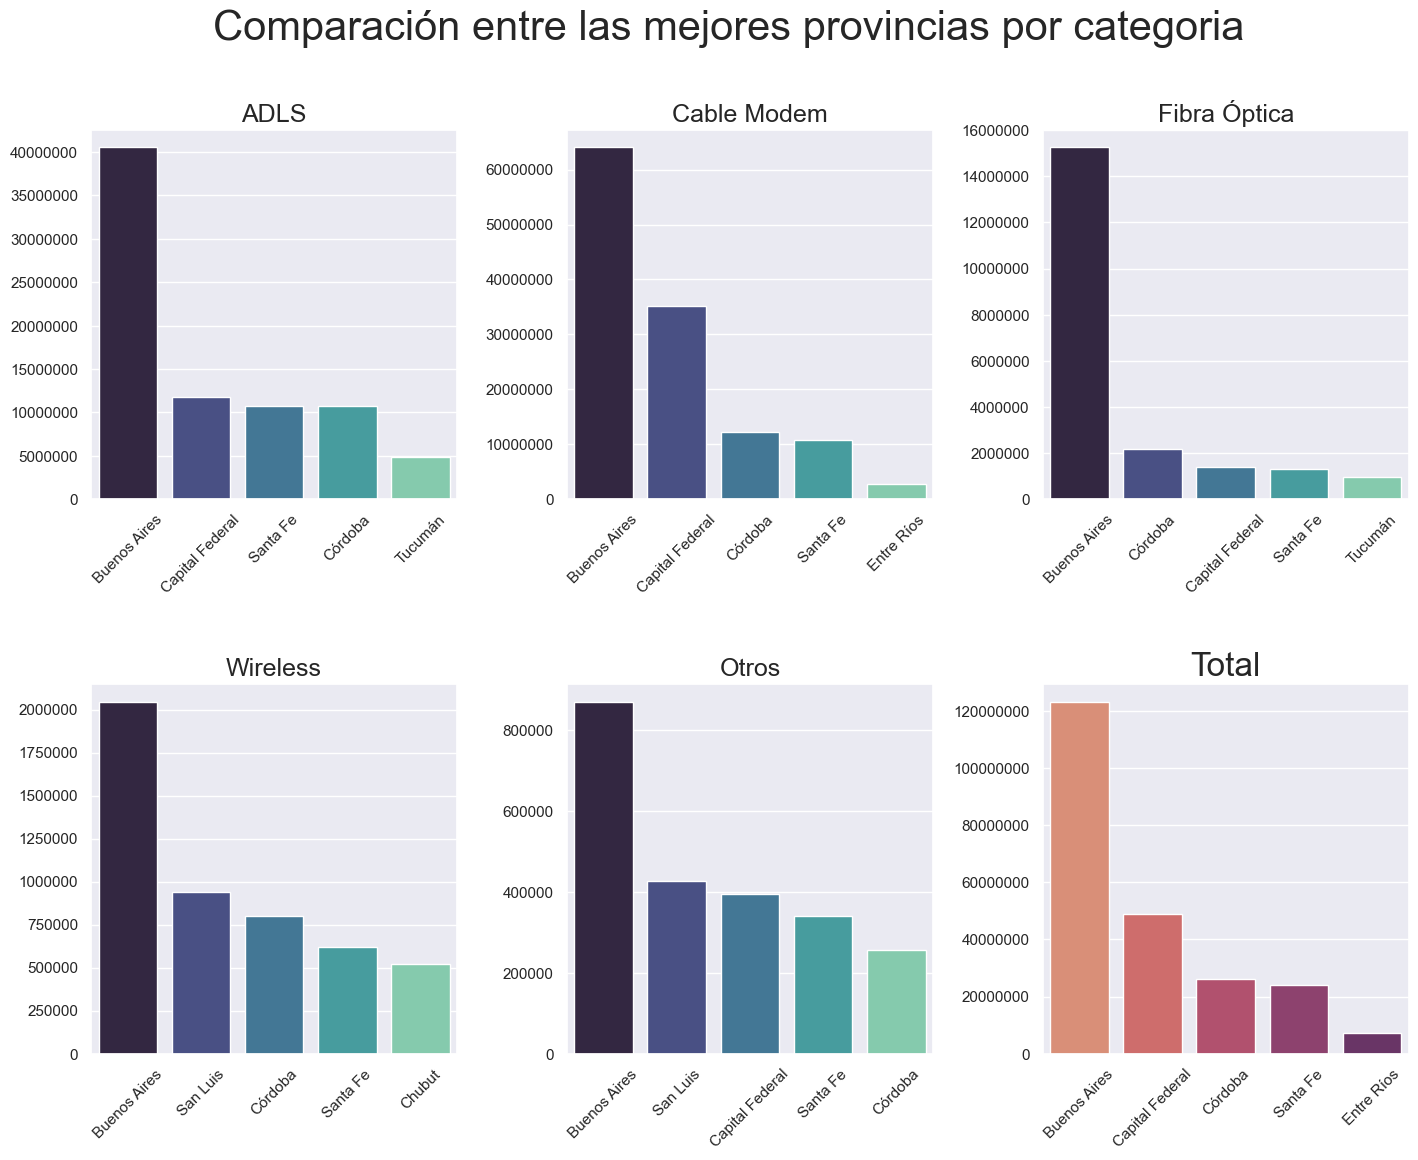

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,12))

# ADLS
sns.barplot(data=adsl[:5], x='Provincia', y='ADSL', ax=axes[0,0], palette="mako")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0,0].ticklabel_format(style='plain', axis='y')
axes[0,0].set_title('ADLS', fontsize=18)
axes[0,0].set_ylabel('')
axes[0, 0].set_xlabel('')

# Cablemodem
sns.barplot(data=cablemodem[:5], x='Provincia', y='Cablemodem', ax=axes[0, 1], palette="mako")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].ticklabel_format(style='plain', axis='y')
axes[0, 1].set_title('Cable Modem', fontsize=18)
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# Fibra Óptica
sns.barplot(data=fibra_optica[:5], x='Provincia', y='Fibra óptica',ax=axes[0,2], palette="mako")
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45)
axes[0, 2].ticklabel_format(style='plain', axis='y')
axes[0, 2].set_title('Fibra Óptica', fontsize=18)
axes[0, 2].set_ylabel('')
axes[0, 2].set_xlabel('')

# Wireless
sns.barplot(data=Wireless[:5], x='Provincia', y='Wireless',ax=axes[1,0], palette="mako")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].ticklabel_format(style='plain', axis='y')
axes[1, 0].set_title('Wireless', fontsize=18)
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('')

# Otros
sns.barplot(data=otros[:5], x='Provincia', y='Otros',ax=axes[1,1], palette="mako")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].ticklabel_format(style='plain', axis='y')
axes[1, 1].set_title('Otros', fontsize=18)
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')

# Total
sns.barplot(data=total[:5], x='Provincia', y='Total',ax=axes[1, 2], palette="flare")
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45)
axes[1, 2].ticklabel_format(style='plain', axis='y')
axes[1, 2].set_title('Total', fontsize=24)
axes[1, 2].set_ylabel('')
axes[1, 2].set_xlabel('')


fig.suptitle('Comparación entre las mejores provincias por categoria', fontsize=30)
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Para agregar mas separación entre los subplots

#### Ahora quiero realizar el mismo grafico que arriba pero con las provincias con menor acceso por cada categoria de telecomunicación

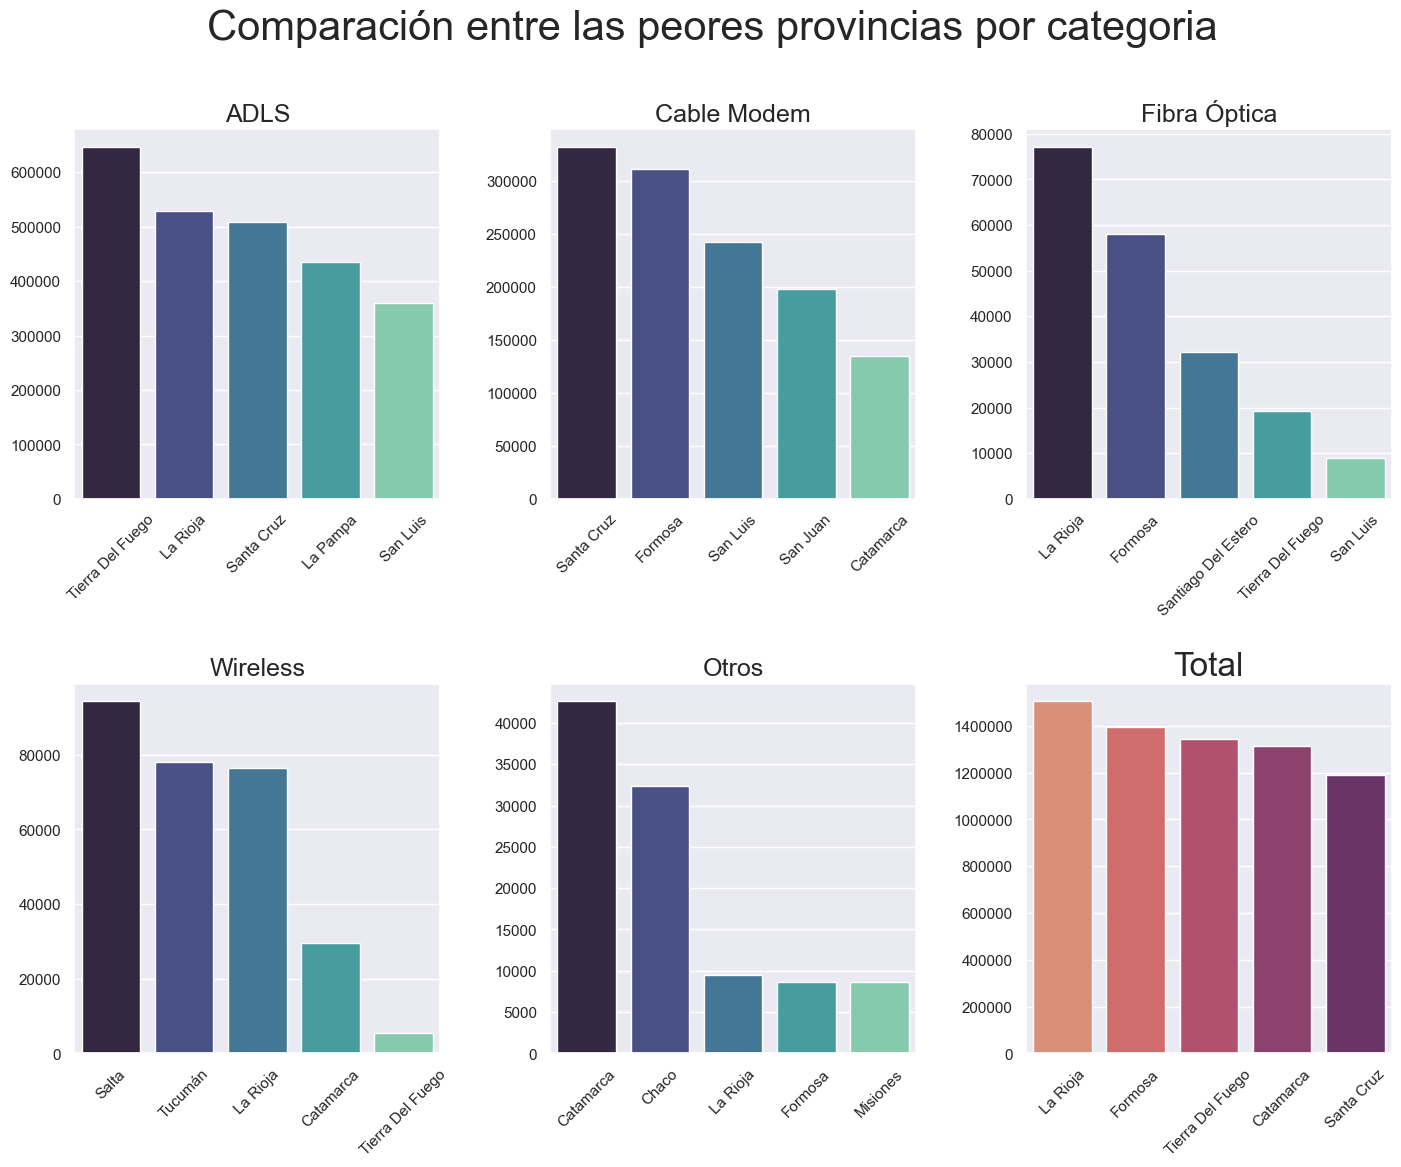

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,12))
# ADLS
sns.barplot(data=adsl[-5:], x='Provincia', y='ADSL', ax=axes[0,0], palette="mako")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0,0].ticklabel_format(style='plain', axis='y')
axes[0,0].set_title('ADLS', fontsize=18)
axes[0,0].set_ylabel('')
axes[0, 0].set_xlabel('')

# Cablemodem
sns.barplot(data=cablemodem[-5:], x='Provincia', y='Cablemodem', ax=axes[0, 1], palette="mako")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].ticklabel_format(style='plain', axis='y')
axes[0, 1].set_title('Cable Modem', fontsize=18)
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# Fibra Óptica
sns.barplot(data=fibra_optica[-5:], x='Provincia', y='Fibra óptica',ax=axes[0,2], palette="mako")
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45)
axes[0, 2].ticklabel_format(style='plain', axis='y')
axes[0, 2].set_title('Fibra Óptica', fontsize=18)
axes[0, 2].set_ylabel('')
axes[0, 2].set_xlabel('')

# Wireless
sns.barplot(data=Wireless[-5:], x='Provincia', y='Wireless',ax=axes[1,0], palette="mako")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].ticklabel_format(style='plain', axis='y')
axes[1, 0].set_title('Wireless', fontsize=18)
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('')

# Otros
sns.barplot(data=otros[-5:], x='Provincia', y='Otros',ax=axes[1,1], palette="mako")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].ticklabel_format(style='plain', axis='y')
axes[1, 1].set_title('Otros', fontsize=18)
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')

# Total
sns.barplot(data=total[-5:], x='Provincia', y='Total',ax=axes[1, 2], palette="flare")
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45)
axes[1, 2].ticklabel_format(style='plain', axis='y')
axes[1, 2].set_title('Total', fontsize=24)
axes[1, 2].set_ylabel('')
axes[1, 2].set_xlabel('')


fig.suptitle('Comparación entre las peores provincias por categoria', fontsize=30)
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Para agregar mas separación entre los subplots

---

### Dataset `mbps_provincias_trimestral.csv`

In [19]:
velocidad_provincias = pd.read_csv('clean_datasets/mbps_provincias_trimestral.csv')
velocidad_provincias.sample(5)

Año  Trimestre            Provincia  Mbps (Media de bajada)
237  2020          2  Santiago Del Estero                      10
839  2014          1              Tucumán                       3
463  2017          4           Entre Ríos                       9
9    2022          3                Jujuy                      32
735  2015          1            Río Negro                       4

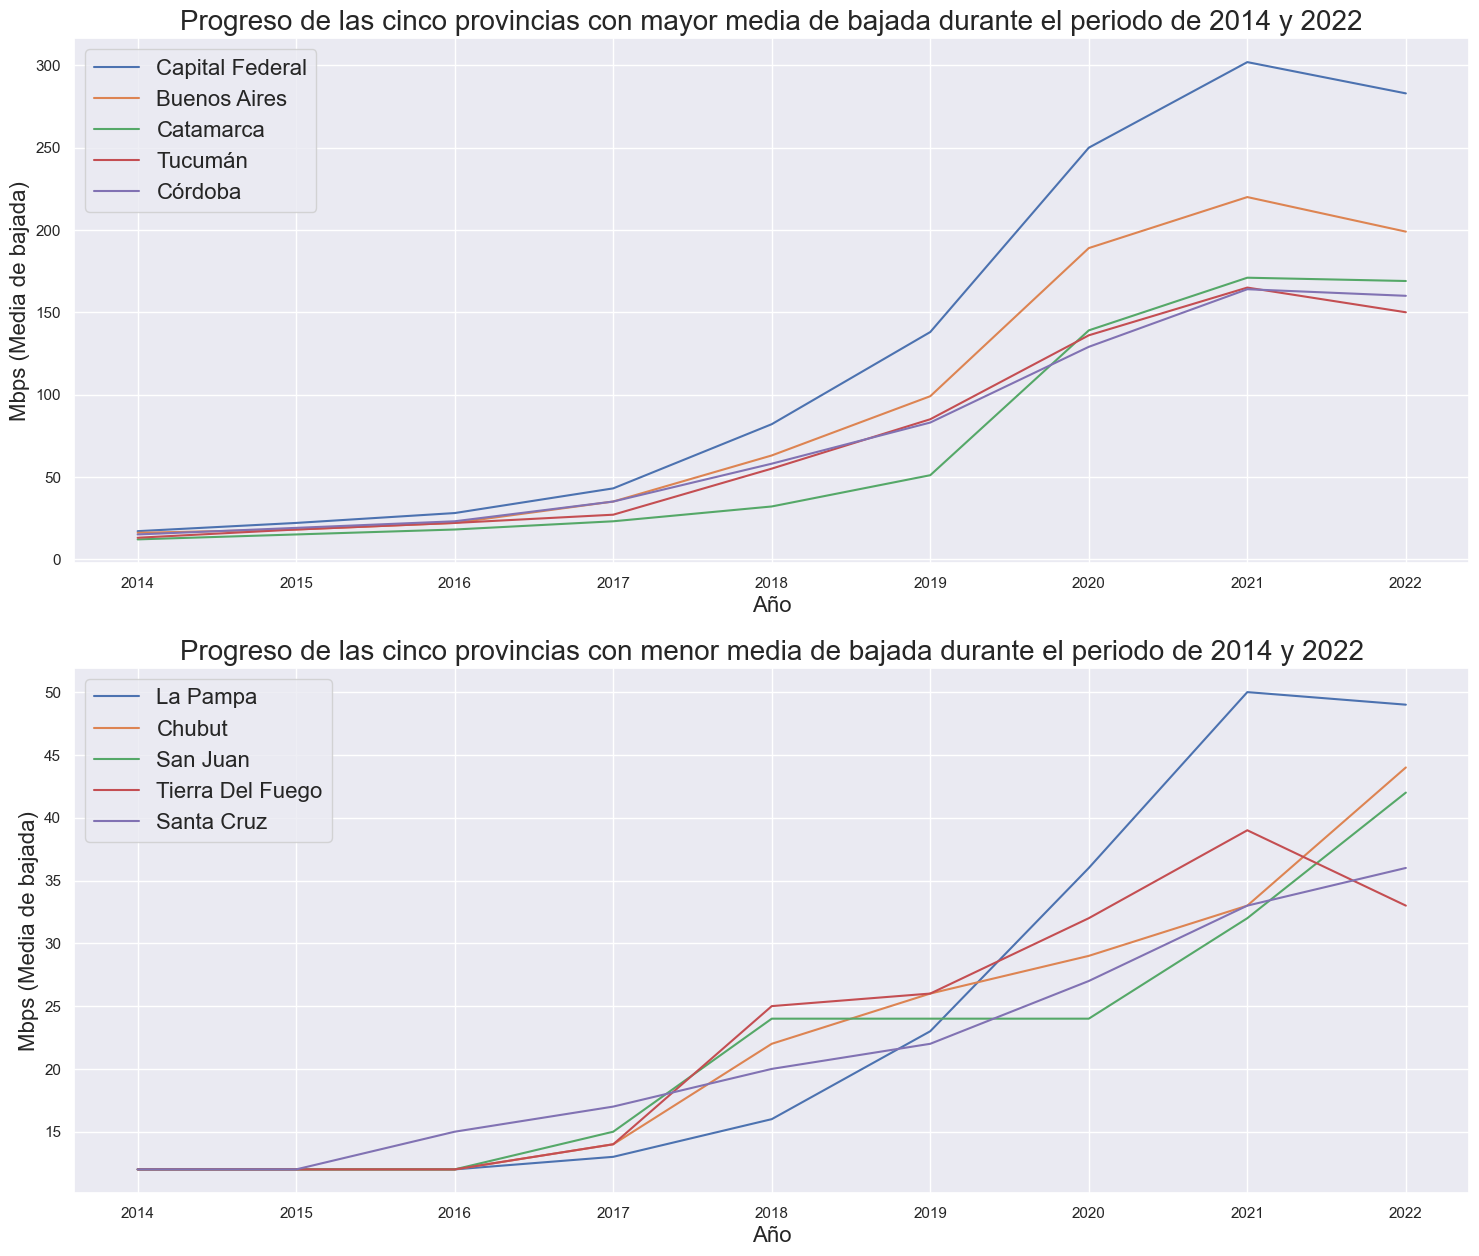

In [20]:
velocidad_provincias = velocidad_provincias.groupby(by=['Provincia', 'Año']).sum().reset_index().sort_values(by='Mbps (Media de bajada)', ascending=False)
mejores_provincias = velocidad_provincias.loc[velocidad_provincias.Provincia.isin(velocidad_provincias.Provincia.unique()[:5])]
peores_provincias = velocidad_provincias.loc[velocidad_provincias.Provincia.isin(velocidad_provincias.Provincia.unique()[-5:])]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

sns.lineplot(data=mejores_provincias, x='Año', y='Mbps (Media de bajada)', hue='Provincia', ax=axes[0], legend='full')
axes[0].set_title('Progreso de las cinco provincias con mayor media de bajada durante el periodo de 2014 y 2022', fontsize=20)

sns.lineplot(data=peores_provincias, x='Año', y='Mbps (Media de bajada)', hue='Provincia', ax=axes[1], legend='full')
axes[1].set_title('Progreso de las cinco provincias con menor media de bajada durante el periodo de 2014 y 2022', fontsize=20)

# Ajustar tamaño de letra en la leyenda
axes[0].legend(fontsize=16)
axes[0].set_xlabel('Año', fontsize=16)
axes[0].set_ylabel('Mbps (Media de bajada)', fontsize=16)

axes[1].legend(fontsize=16)
axes[1].set_xlabel('Año', fontsize=16)
axes[1].set_ylabel('Mbps (Media de bajada)', fontsize=16)

plt.show()

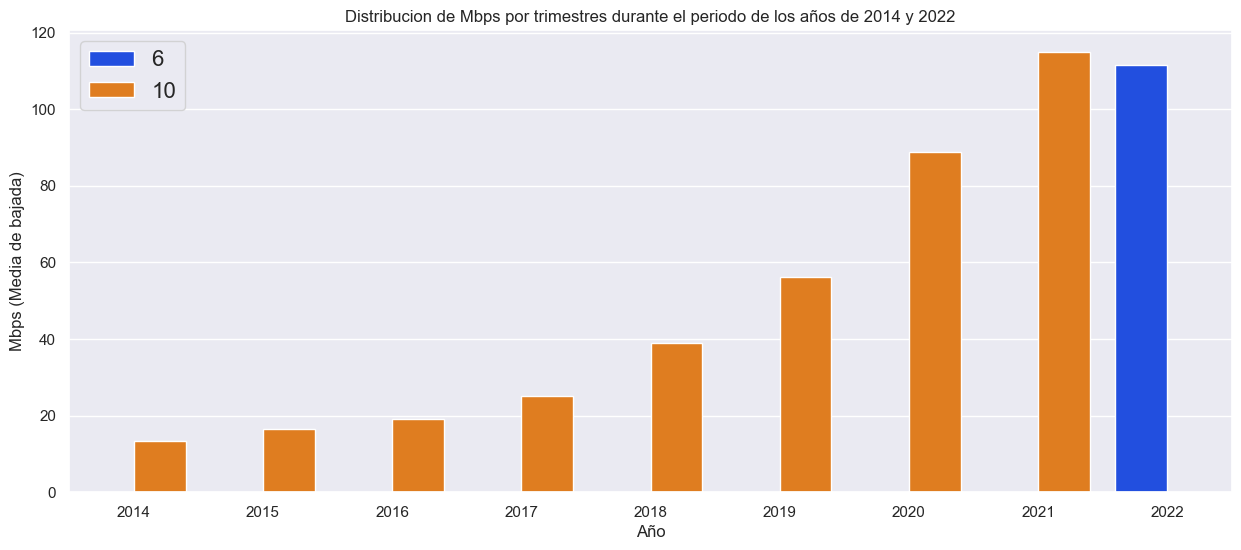

In [21]:
mbps_trimestral = velocidad_provincias.groupby(by=['Año','Trimestre']).mean().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data = mbps_trimestral, x='Año', y='Mbps (Media de bajada)',hue = 'Trimestre', palette='bright')
plt.title('Distribucion de Mbps por trimestres durante el periodo de los años de 2014 y 2022')
plt.legend(fontsize=16)
plt.show()


---

### Datasets `acceso_por_hogares_habitantes_pais_trimestral.csv`

In [246]:
internet_hogares = pd.read_csv('clean_datasets/acceso_por_hogares_habitantes_pais_trimestral.csv')

In [247]:
data_internet_hogares = internet_hogares.groupby(by=['Año','Trimestre']).mean().reset_index()

In [25]:
data_internet_hogares.head()

Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab
0  2014          1                         49.55                     15.05
1  2014          2                         49.86                     15.16
2  2014          3                         50.67                     15.43
3  2014          4                         50.50                     15.39
4  2015          1                         51.36                     15.68

<AxesSubplot: xlabel='Año', ylabel='Accesos por cada 100 hab'>

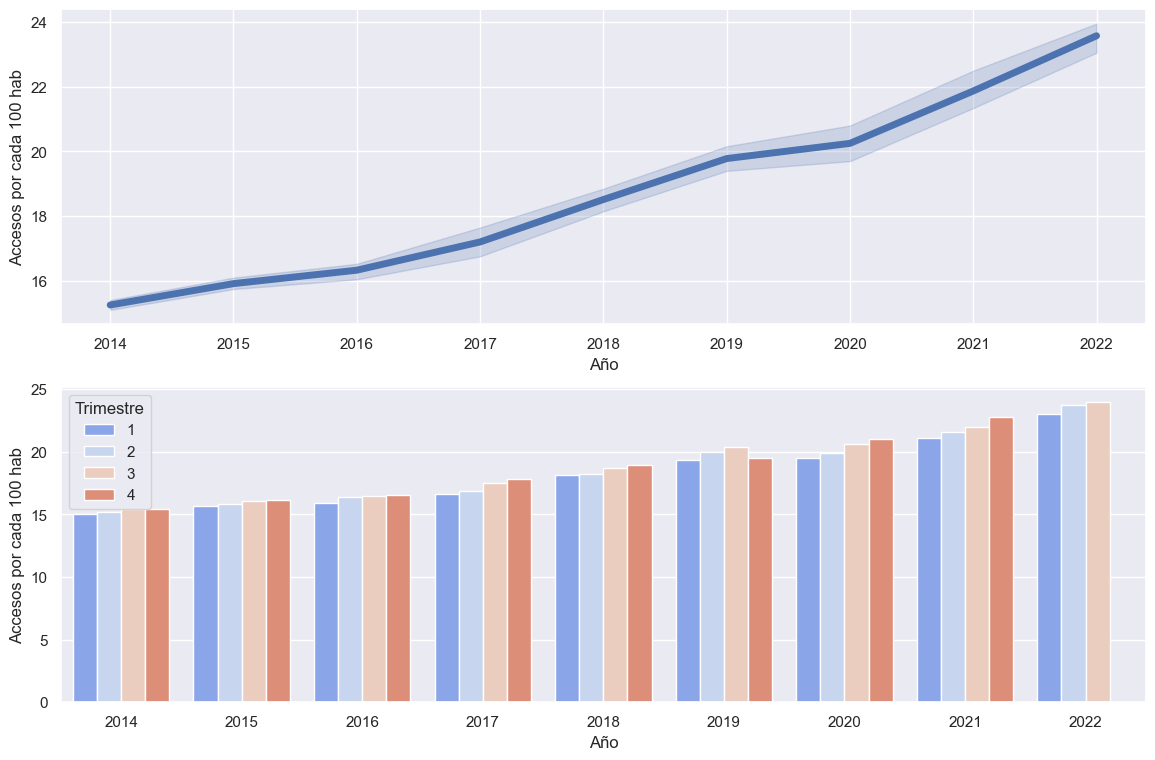

In [248]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,9))
sns.lineplot(data = data_internet_hogares, x='Año', y='Accesos por cada 100 hab', ax=ax[0], linewidth=5, linestyle='-')
ax[0].grid(True)

sns.barplot(data = data_internet_hogares, x='Año', y='Accesos por cada 100 hab',hue='Trimestre', ax=ax[1], palette='coolwarm')

---

### Dataset `velocidad_pais_trimestral.csv`

In [26]:
internet_velocidad_pais = pd.read_csv('clean_datasets/velocidad_pais_trimestral.csv')
internet_velocidad_pais.sample(5)

Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
12  2019          3         241.713                   80.599   
10  2020          1          42.550                   56.170   
3   2021          4          41.262                   28.521   
9   2020          2          41.038                   48.690   
11  2019          4          38.272                   28.980   

   Entre 1 Mbps y 6 Mbps Entre 6 Mbps y 10 Mbps Entre 10 Mbps y 20 Mbps  \
12             3.309.137              1.026.859                 806.466   
10             2.649.819              1.022.014                 814.470   
3              1.413.208              1.245.333                 976.539   
9              2.651.502              1.053.107                 807.775   
11             2.792.307              1.046.128                 851.619   

   Entre 20 Mbps y 30 Mbps Más de 30 Mbps    OTROS       Total  
12               1.141.545      2.314.898  243.467   9.164.684  
10                 532.309      3.500.882  194.212   8.812.426  
3                  558.358      6.032.322  194.251  10.489.794  
9                  523.437      3.711.499  194.008   9.031.056  
11               1.004.083      2.830.746  201.046   8.793.181

In [27]:
for column in internet_velocidad_pais:
    internet_velocidad_pais[column] = pd.to_numeric(internet_velocidad_pais[column].astype(str).str.replace('.',''))

In [28]:
internet_velocidad_pais.dtypes

Año                        int64
Trimestre                  int64
Hasta 512 kbps             int64
Entre 512 Kbps y 1 Mbps    int64
Entre 1 Mbps y 6 Mbps      int64
Entre 6 Mbps y 10 Mbps     int64
Entre 10 Mbps y 20 Mbps    int64
Entre 20 Mbps y 30 Mbps    int64
Más de 30 Mbps             int64
OTROS                      int64
Total                      int64
dtype: object

---

### Dataset `velocidad_provincias_trimestral.csv`

In [29]:
internet_velocidad_provincias = pd.read_csv('clean_datasets/velocidad_provincias_trimestral.csv')
internet_velocidad_provincias.sample(5)

Año  Trimestre         Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
379  2018          4        Santa Cruz             250                 1150   
677  2015          3           Córdoba            1500                68765   
40   2022          2             Salta            1140                  153   
694  2015          3  Tierra Del Fuego             150                 2850   
226  2020          2          La Pampa            2930                 8100   

     + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
379              23107                7790                 2060   
677             429787               61109                59372   
40               33732               72661                 6012   
694              36408                  20                    0   
226              71218                7531                   38   

     + 20 Mbps - 30 Mbps  + 30 Mbps  OTROS   Total  
379                   10          4   5310   24768  
677                 2582       1048      0  622813  
40                  1156      81478   6494  203177  
694                    0          0      0   36710  
226                 1657       3377   1123   89809

In [30]:
columns = ['HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total']

for column in columns:
    internet_velocidad_provincias[column] = pd.to_numeric(internet_velocidad_provincias[column].fillna(0).astype(str).str.replace('.',''))

In [31]:
internet_velocidad_provincias.dtypes

Año                     int64
Trimestre               int64
Provincia              object
HASTA 512 kbps          int64
+ 512 Kbps - 1 Mbps     int64
+ 1 Mbps - 6 Mbps       int64
+ 6 Mbps - 10 Mbps      int64
+ 10 Mbps - 20 Mbps     int64
+ 20 Mbps - 30 Mbps     int64
+ 30 Mbps               int64
OTROS                   int64
Total                   int64
dtype: object

In [32]:
data_velocidad_int_pais = internet_velocidad_pais.groupby(by='Año').mean().reset_index()
data_velocidad_int_pais.sample(3)

Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
4  2018        2.5     8207.500000                214164.50   
8  2022        2.0    23389.666667                 68903.00   
5  2019        2.5   116709.250000                 72200.25   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
4             3332212.75               924543.25               1763424.25   
8             1205911.00              1186028.00                882525.00   
5             3243665.25               956741.25               1073116.25   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps      OTROS         Total  
4             1.280622e+06    4.916810e+05  195975.50  8.242047e+06  
8             4.916577e+05    6.691286e+06  299654.00  1.089127e+07  
5             1.160052e+06    1.990550e+06  176288.25  8.891545e+06

In [33]:
columns = ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total']

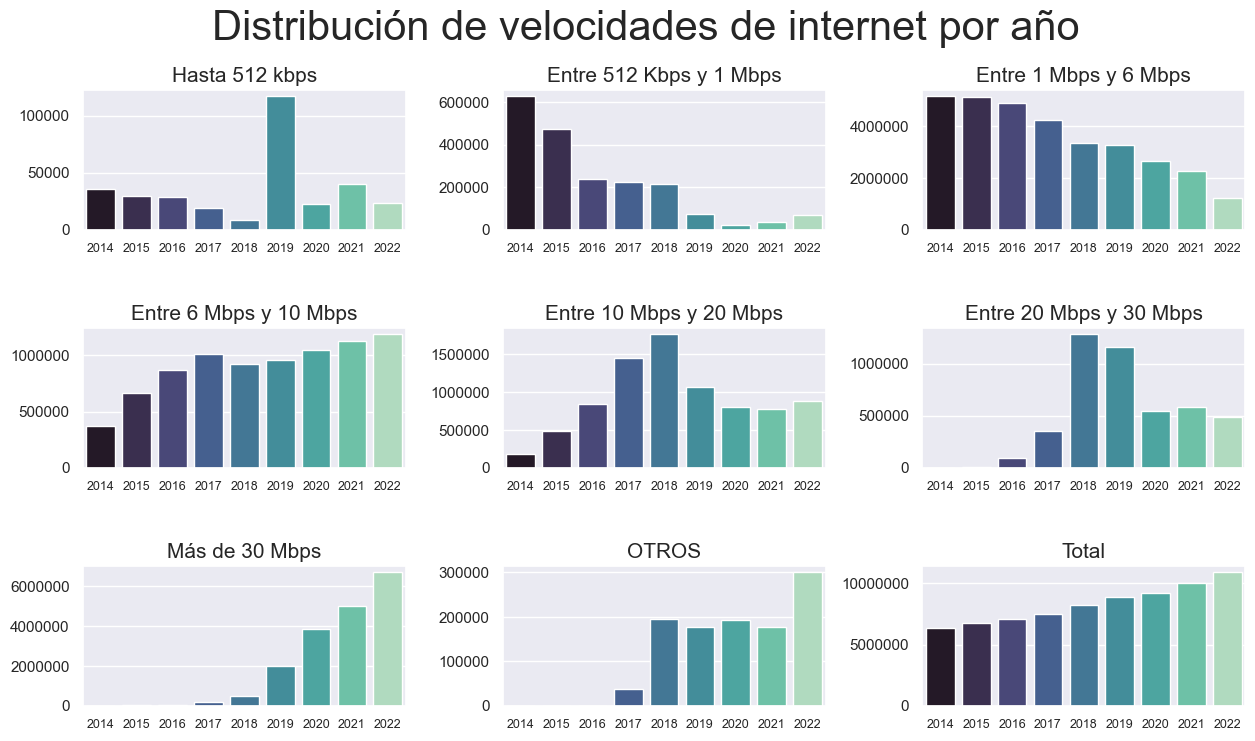

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,8))

for index, ax in enumerate(axes.flatten()):
    sns.barplot(data = data_velocidad_int_pais, x='Año', y=columns[index], ax=ax, palette='mako')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=9)
    ax.ticklabel_format(style='plain', axis='y')
    ax.set_title(columns[index], fontsize=15)
    ax.set_ylabel('')
    ax.set_xlabel('')

fig.suptitle('Distribución de velocidades de internet por año', fontsize=30)
fig.subplots_adjust(hspace=0.7, wspace=0.3) # Para agregar mas separación entre los subplots


In [36]:
def velocidades_por_año(año):
    # Filtrar los datos para el año seleccionado
    data_velocidad_int_pais_año = data_velocidad_int_pais[data_velocidad_int_pais.Año == año]

    # Convertir las columnas de velocidades de Internet en una sola columna
    data_velocidad_int_pais_melted = pd.melt(data_velocidad_int_pais_año, id_vars=['Año', 'Trimestre','Total'], var_name='Velocidad', value_name='Cantidad')

    plt.figure(figsize=(15,5.5))

    # Graficar el barplot con todas las velocidades del año seleccionado
    sns.barplot(data=data_velocidad_int_pais_melted, y='Velocidad', x='Cantidad')

    # Configuración adicional
    plt.ylabel('Velocidad', fontsize=20)
    plt.ticklabel_format(style='plain', axis='x')
    plt.xlabel('Cantidad', fontsize=20)
    plt.title(f'Velocidades de Internet - Año {año}', fontsize=26)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=14)


    # Mostrar el gráfico
    plt.show()

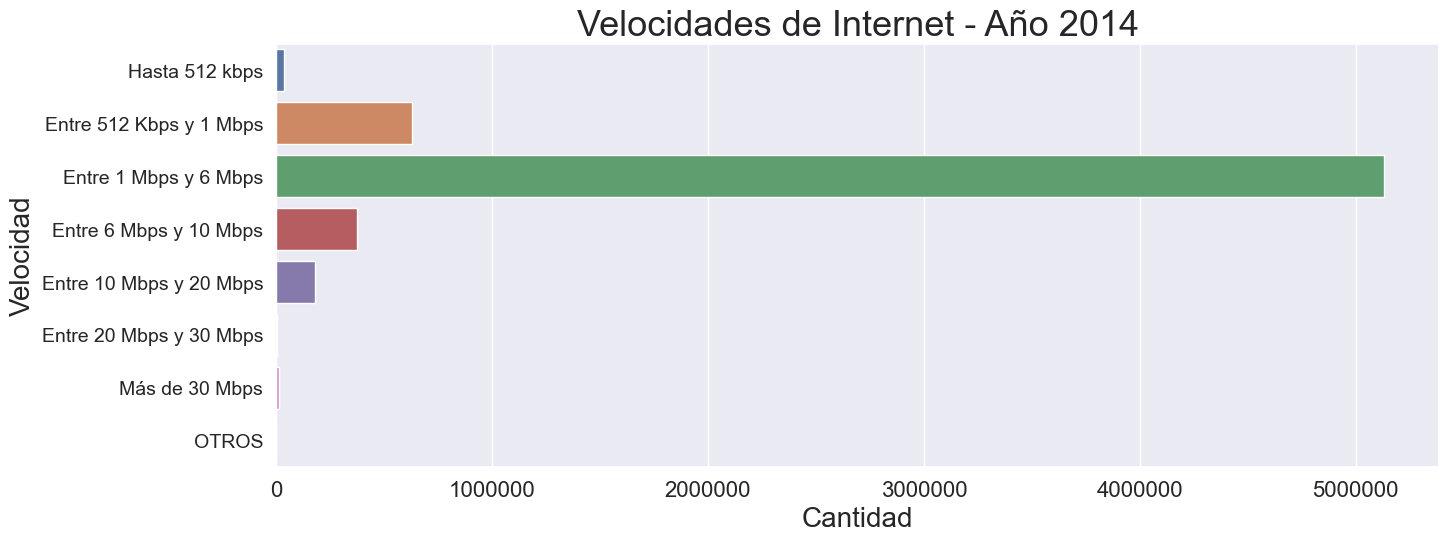

In [37]:
velocidades_por_año(2014)

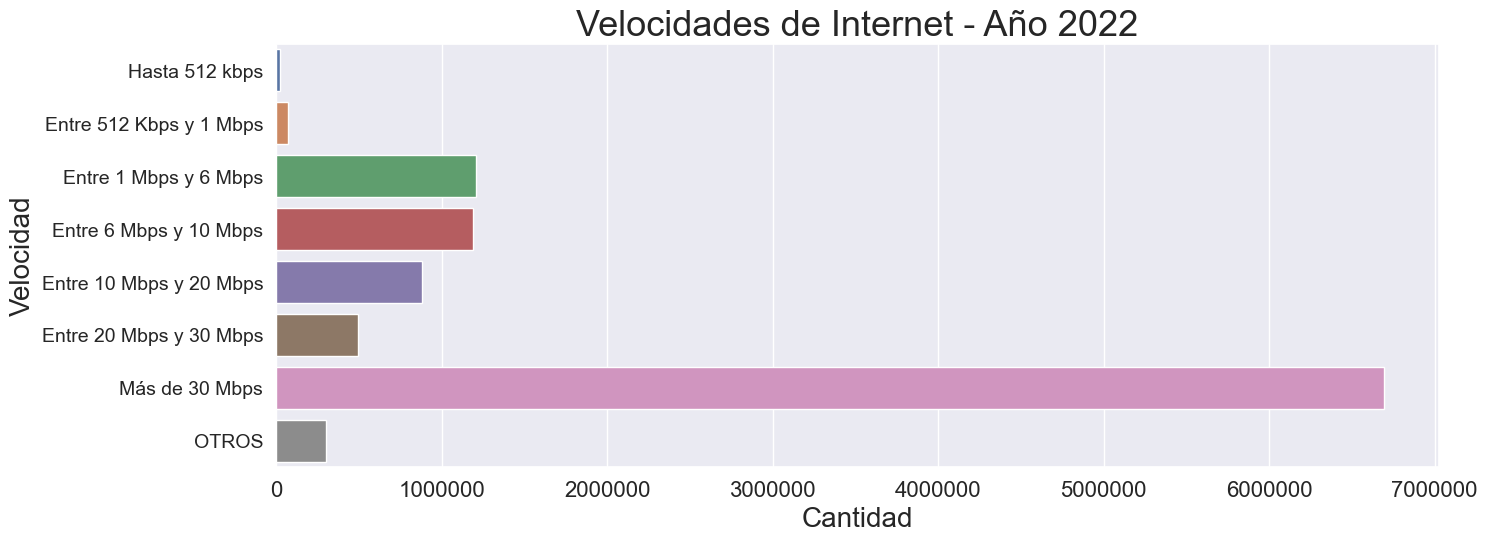

In [38]:
velocidades_por_año(2022)

Quiero comparar como fue el avanze de las velocidades durante el perdiodo de los 9 años, comparando en un mimso grafico las velocidades del año 2014 con las del 2022

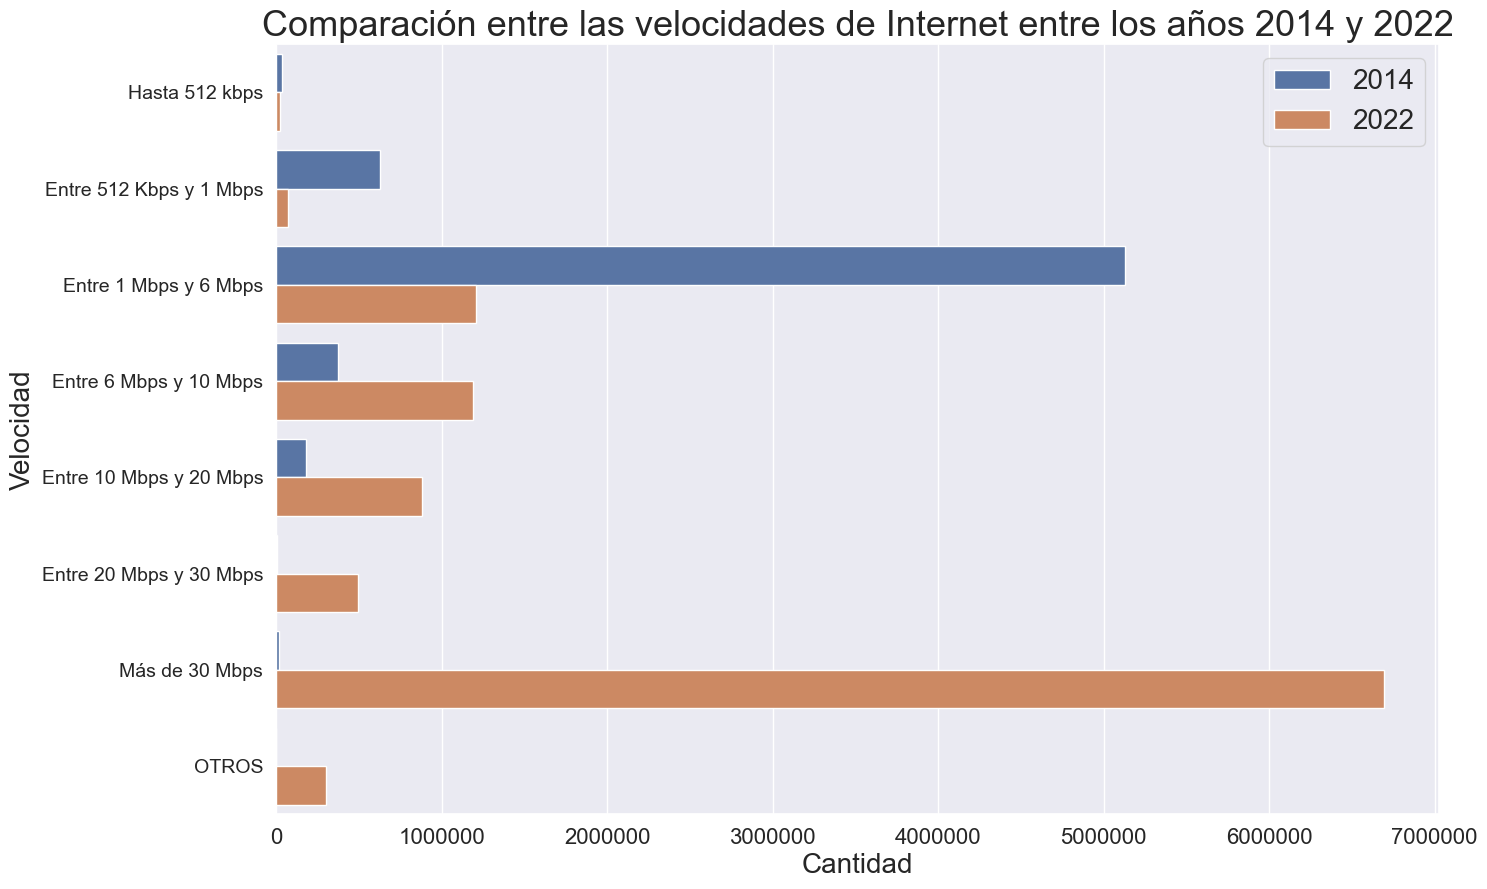

In [39]:
data_velocidad_int_pais_año = data_velocidad_int_pais[(data_velocidad_int_pais.Año == 2014) | (data_velocidad_int_pais.Año == 2022)]

# Convertir las columnas de velocidades de Internet en una sola columna
data_velocidad_int_pais_melted = pd.melt(data_velocidad_int_pais_año, id_vars=['Año', 'Trimestre','Total'], var_name='Velocidad', value_name='Cantidad')

plt.figure(figsize=(15,10))

# Graficar el barplot con todas las velocidades del año seleccionado
sns.barplot(data=data_velocidad_int_pais_melted, y='Velocidad', x='Cantidad', hue='Año')

# Configuración adicional
plt.ylabel('Velocidad', fontsize=20)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Cantidad', fontsize=20)
plt.title(f'Comparación entre las velocidades de Internet entre los años 2014 y 2022', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)

# Mostrar el gráfico
plt.show()

Este grafico muestre el progreso que habo en la Republica Argentina en el ambito de las velocidades del Internet

Hago uan compración de los años en varios subplots

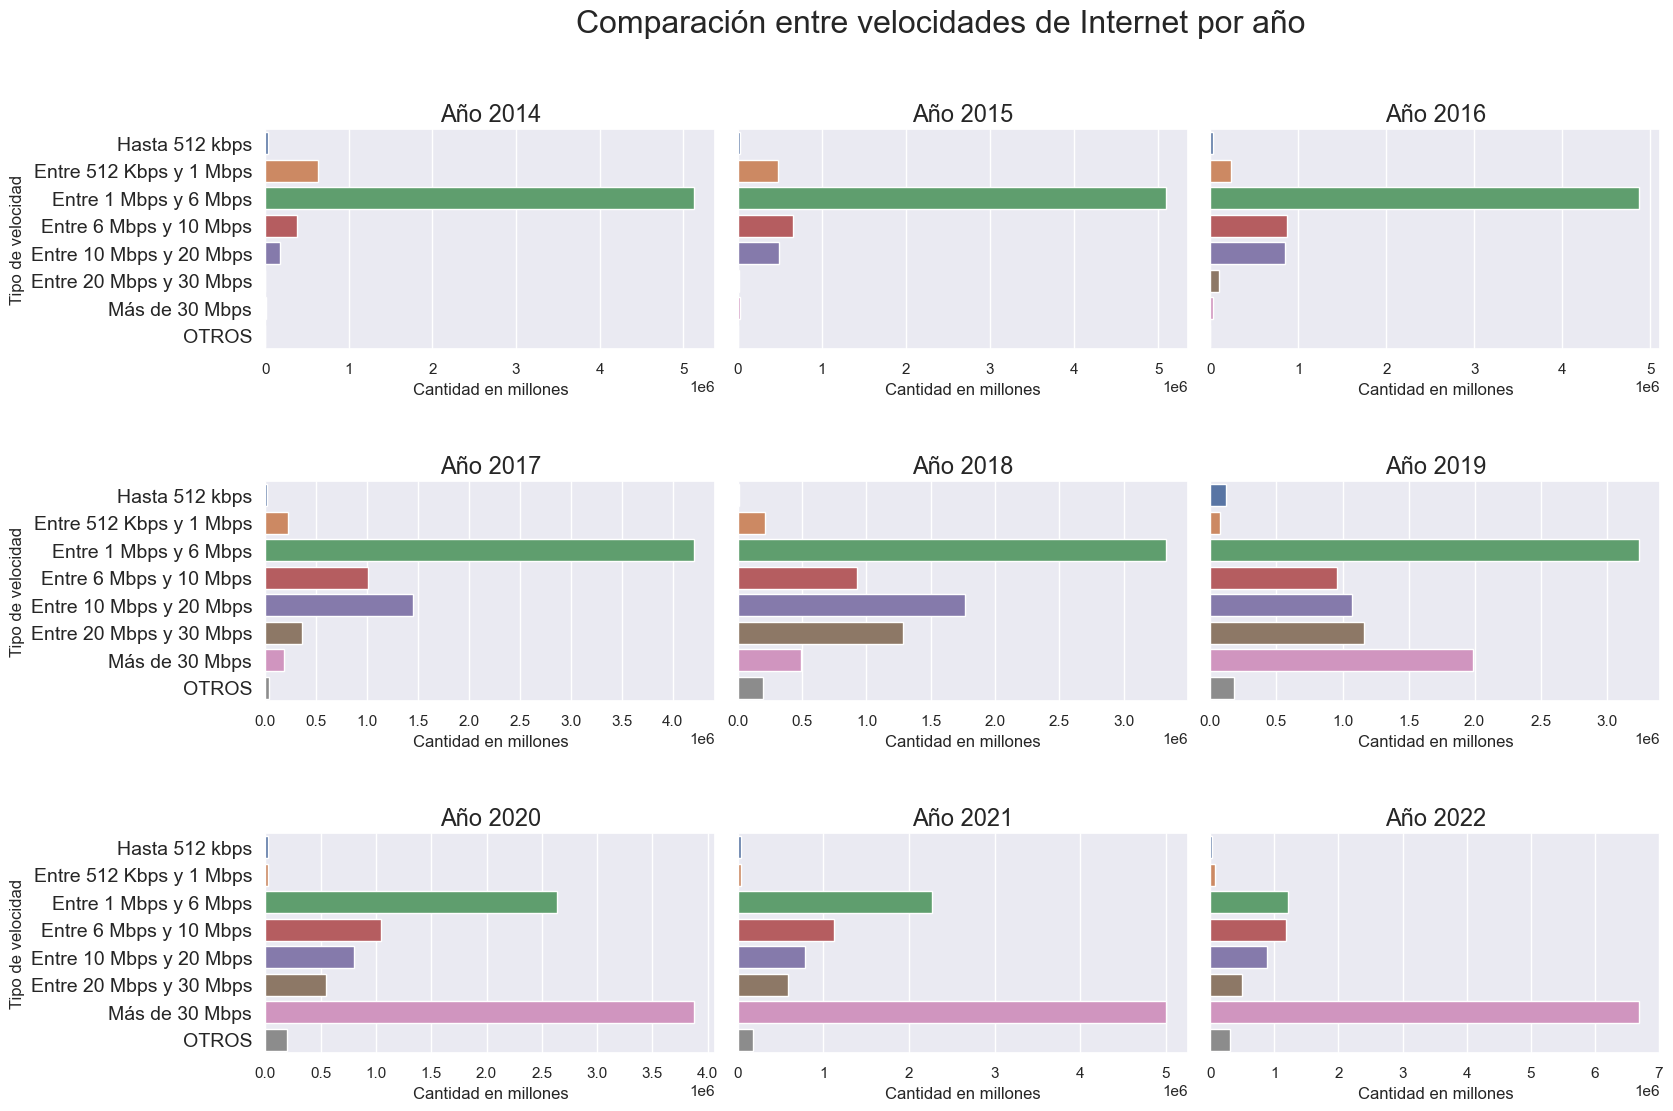

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,12))
años = data_velocidad_int_pais.Año.unique()
for index, ax in enumerate(axes.flatten()):
    data_velocidad_int_pais_año = data_velocidad_int_pais[data_velocidad_int_pais.Año == años[index]]
    data_velocidad_int_pais_melted = pd.melt(data_velocidad_int_pais_año, id_vars=['Año', 'Trimestre','Total'], var_name='Tipo de velocidad', value_name='Cantidad en millones')
    sns.barplot(data = data_velocidad_int_pais_melted, x='Cantidad en millones', y='Tipo de velocidad', ax=ax)
    if ax not in [axes[0, 0], axes[1, 0], axes[2, 0]]:
        ax.set_ylabel("")
        ax.set_yticks([])
    #if ax not in [axes[2, 0], axes[2, 1], axes[2, 2]]:
        #ax.set_xlabel('')
    ax.set_title(f'Año {años[index]}', fontsize=17)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=14)

plt.suptitle('Comparación entre velocidades de Internet por año', fontsize=23)
plt.subplots_adjust(hspace=0.6, wspace=0.05)


---

### Dataset `internet_fijo_localidades_partidos.csv`

In [41]:
internet_fijo_tech_localidades = pd.read_csv('clean_datasets/internet_fijo_localidades_partidos.csv')
internet_fijo_tech_localidades.sample(5)

Provincia                  Partido       Localidad Link Indec  ADSL  \
2871      SANTA FE                San Justo        Angeloni   82112010     0   
140   BUENOS AIRES                Chacabuco       O'Higgins    6210040    54   
970        CORDOBA                    Colón           OTROS  Sin Datos     0   
2313         SALTA  Grl. José de San Martín    Padre Lozano   66056180     0   
1903       MENDOZA            Luján de Cuyo  Las Compuertas   50063070  1050   

      CABLEMODEM  DIAL UP  FIBRA OPTICA  OTROS  SATELITAL  WIMAX  WIRELESS  \
2871           0        0             0      0          0      0        24   
140           95        0             0      0          0      0        12   
970            0        0             0      0          0      0       287   
2313           0        0             0      0          0      0         0   
1903           0        7             0      0          0      0        42   

      Total general  
2871             24  
140             161  
970             287  
2313              0  
1903           1099

In [253]:
tecnologias = ['ADSL','CABLEMODEM','DIAL UP','FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS','Total general']

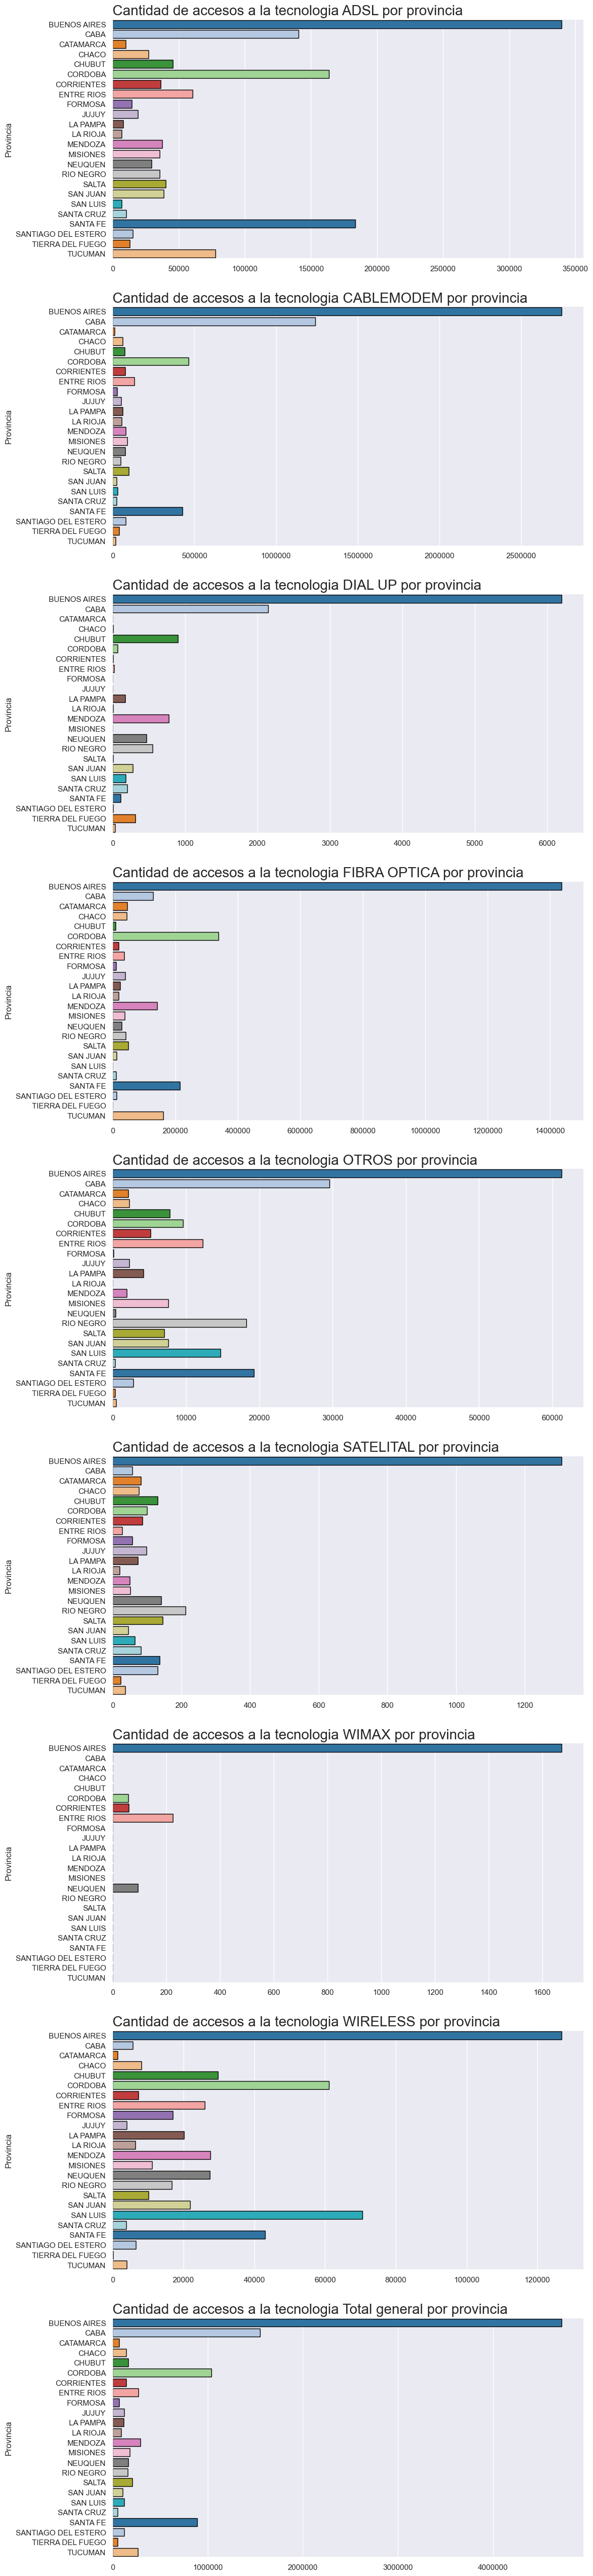

In [269]:
data_internet_tecnologia_localidades = internet_fijo_tech_localidades.groupby(by='Provincia').sum().reset_index()

fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(12,65))

for i in range(9):
    sns.barplot(ax=axes[i], data = data_internet_tecnologia_localidades, x= tecnologias[i],y='Provincia', palette='tab20', edgecolor='black')
    axes[i].set_title(f'Cantidad de accesos a la tecnologia {tecnologias[i]} por provincia', fontsize=20, loc='left')
    axes[i].set_xlabel('')
    axes[i].ticklabel_format(style='plain', axis='x')

In [46]:
provincias = data_internet_tecnologia_localidades.Provincia.unique()
provincias

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

In [270]:
data_internet_tecnologia_localidades

Provincia    ADSL  CABLEMODEM  DIAL UP  FIBRA OPTICA  OTROS  \
0          BUENOS AIRES  339648     2748325     6199       1436433  61238   
1                  CABA  140791     1240125     2145        129218  29585   
2             CATAMARCA   10010       10495        1         46224   2152   
3                 CHACO   27164       61800        5         44645   2277   
4                CHUBUT   45377       72212      904          9574   7796   
5               CORDOBA  163770      465461       68        338570   9571   
6            CORRIENTES   36508       77140        4         18619   5174   
7            ENTRE RIOS   60345      132952       22         36971  12320   
8               FORMOSA   14470       25880        1         11041    154   
9                 JUJUY   19257       52978        0         40172   2284   
10             LA PAMPA    7796       60078      171         23551   4206   
11             LA RIOJA    6842       53899        4         19697      7   
12              MENDOZA   37659       78858      777        142615   1939   
13             MISIONES   35513       88902        0         39046   7571   
14              NEUQUEN   29352       75815      468         29396    412   
15            RIO NEGRO   35552       48260      548         41017  18209   
16                SALTA   40006       96984        5         50254   7064   
17             SAN JUAN   38570       22723      281         12328   7592   
18             SAN LUIS    6860       29363      182           248  14739   
19           SANTA CRUZ   10170       24047      198         10815    301   
20             SANTA FE  183740      426255      110        215189  19300   
21  SANTIAGO DEL ESTERO   15385       80937        2         13170   2789   
22     TIERRA DEL FUEGO   12754       39963      312           403    316   
23              TUCUMAN   77738       18518       30        162345    453   

    SATELITAL  WIMAX  WIRELESS  Total general  
0        1307   1672    126846        4721668  
1          57      0      5758        1547679  
2          82      0      1329          70293  
3          77      0      8178         144146  
4         131      0     29784         165778  
5         100     58     61070        1038668  
6          86     59      7256         144846  
7          27    224     26098         268959  
8          57      0     16935          68538  
9          99      0      4033         118823  
10         74      0     20216         116092  
11         20      0      6395          86864  
12         50      0     27625         289523  
13         51      0     11074         182157  
14        142     94     27482         163161  
15        212      0     16760         160558  
16        146      0     10082         204541  
17         45      0     21860         103399  
18         64      0     70614         122070  
19         83      0      3896          49510  
20        137      0     43079         887810  
21        131      0      6618         119032  
22         23      0       125          53896  
23         36      0      3997         263117

In [312]:
data_internet_tecnologia_localidades.sort_values(by='Total general', ascending=False)[:5].Provincia.unique()

array(['BUENOS AIRES', 'CABA', 'CORDOBA', 'SANTA FE', 'MENDOZA'],
      dtype=object)

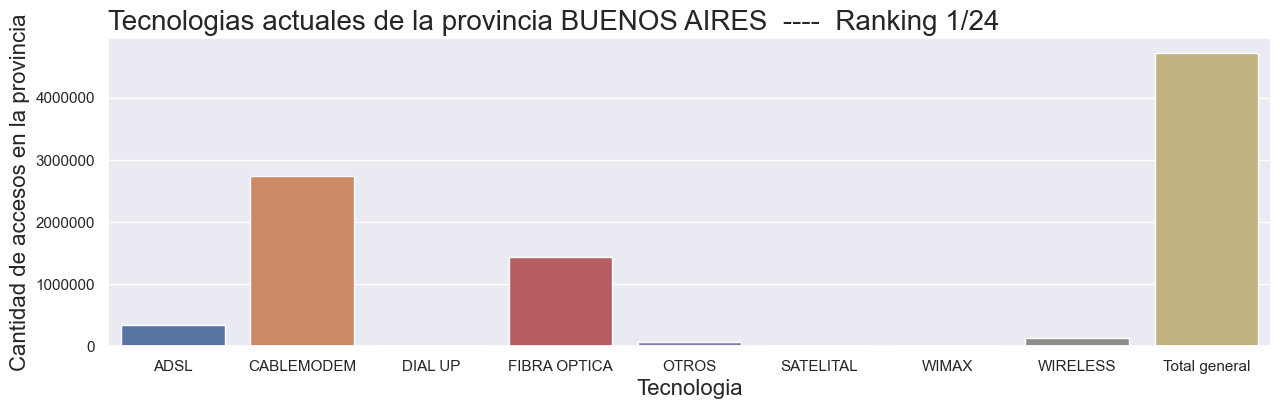

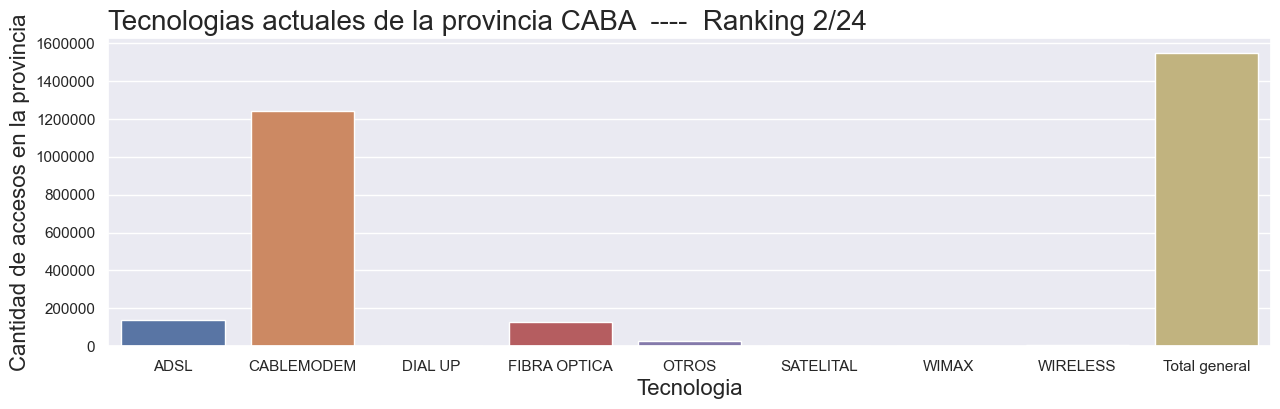

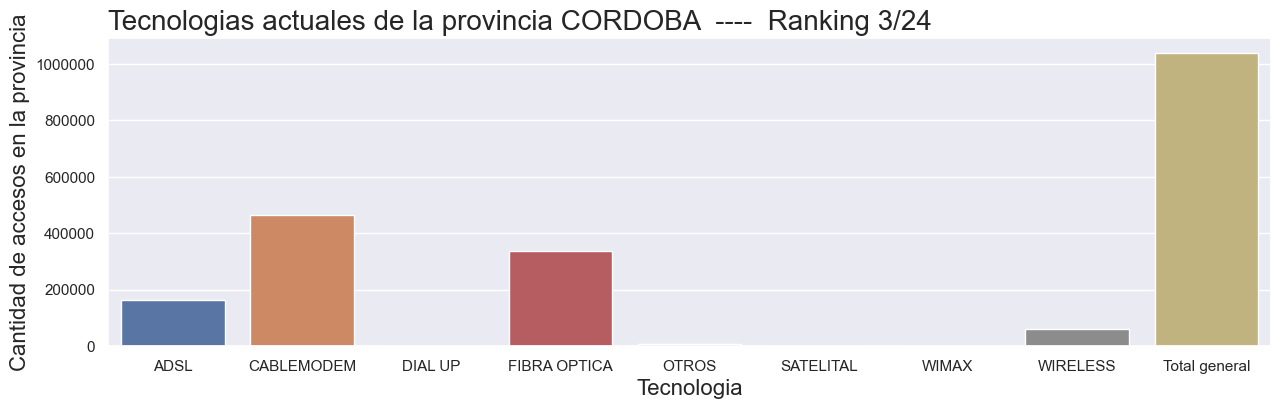

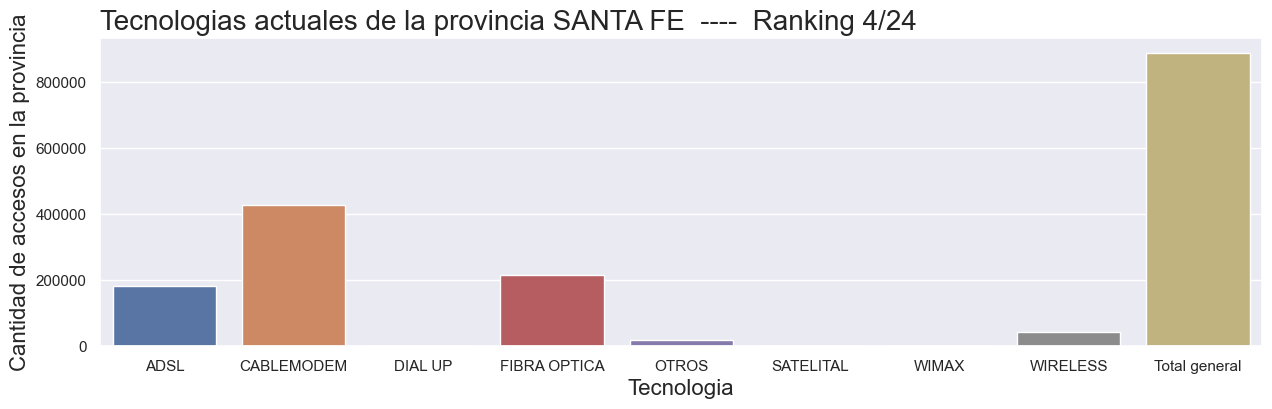

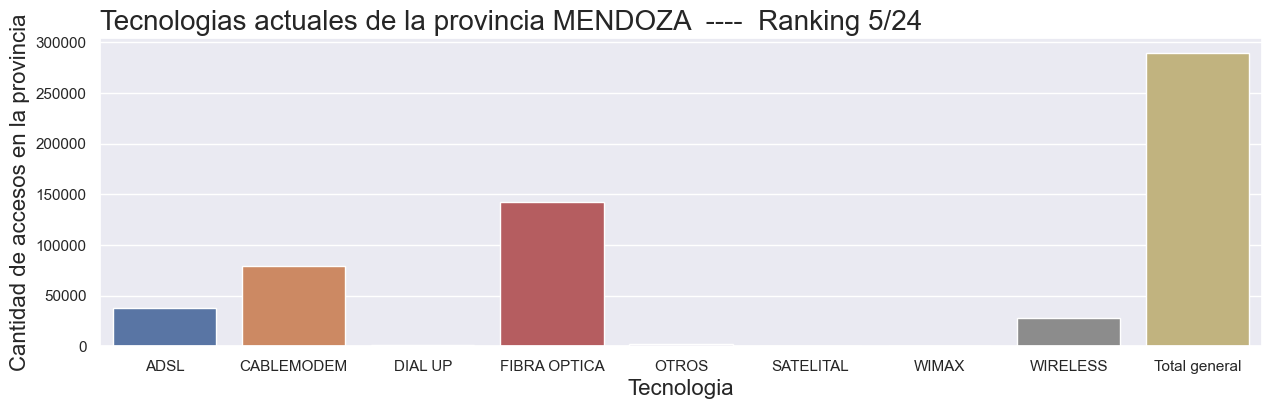

In [320]:
# Las cinco provincias con mas accesos en todo el pais
provincias = data_internet_tecnologia_localidades.sort_values(by='Total general', ascending=False).Provincia.unique()

for index, prov in enumerate(provincias[:5]):
    plt.figure(figsize=(15,4))
    sns.barplot(data = data_internet_tecnologia_localidades[data_internet_tecnologia_localidades.Provincia == prov])
    plt.title(f'Tecnologias actuales de la provincia {prov}  ----  Ranking {provincias.tolist().index(prov) + 1}/24', fontsize=20, loc='left')
    plt.ticklabel_format(style='plain',axis='y')
    plt.ylabel('Cantidad de accesos en la provincia', fontsize=16)
    plt.xlabel('Tecnologia', fontsize=16)
    plt.show()

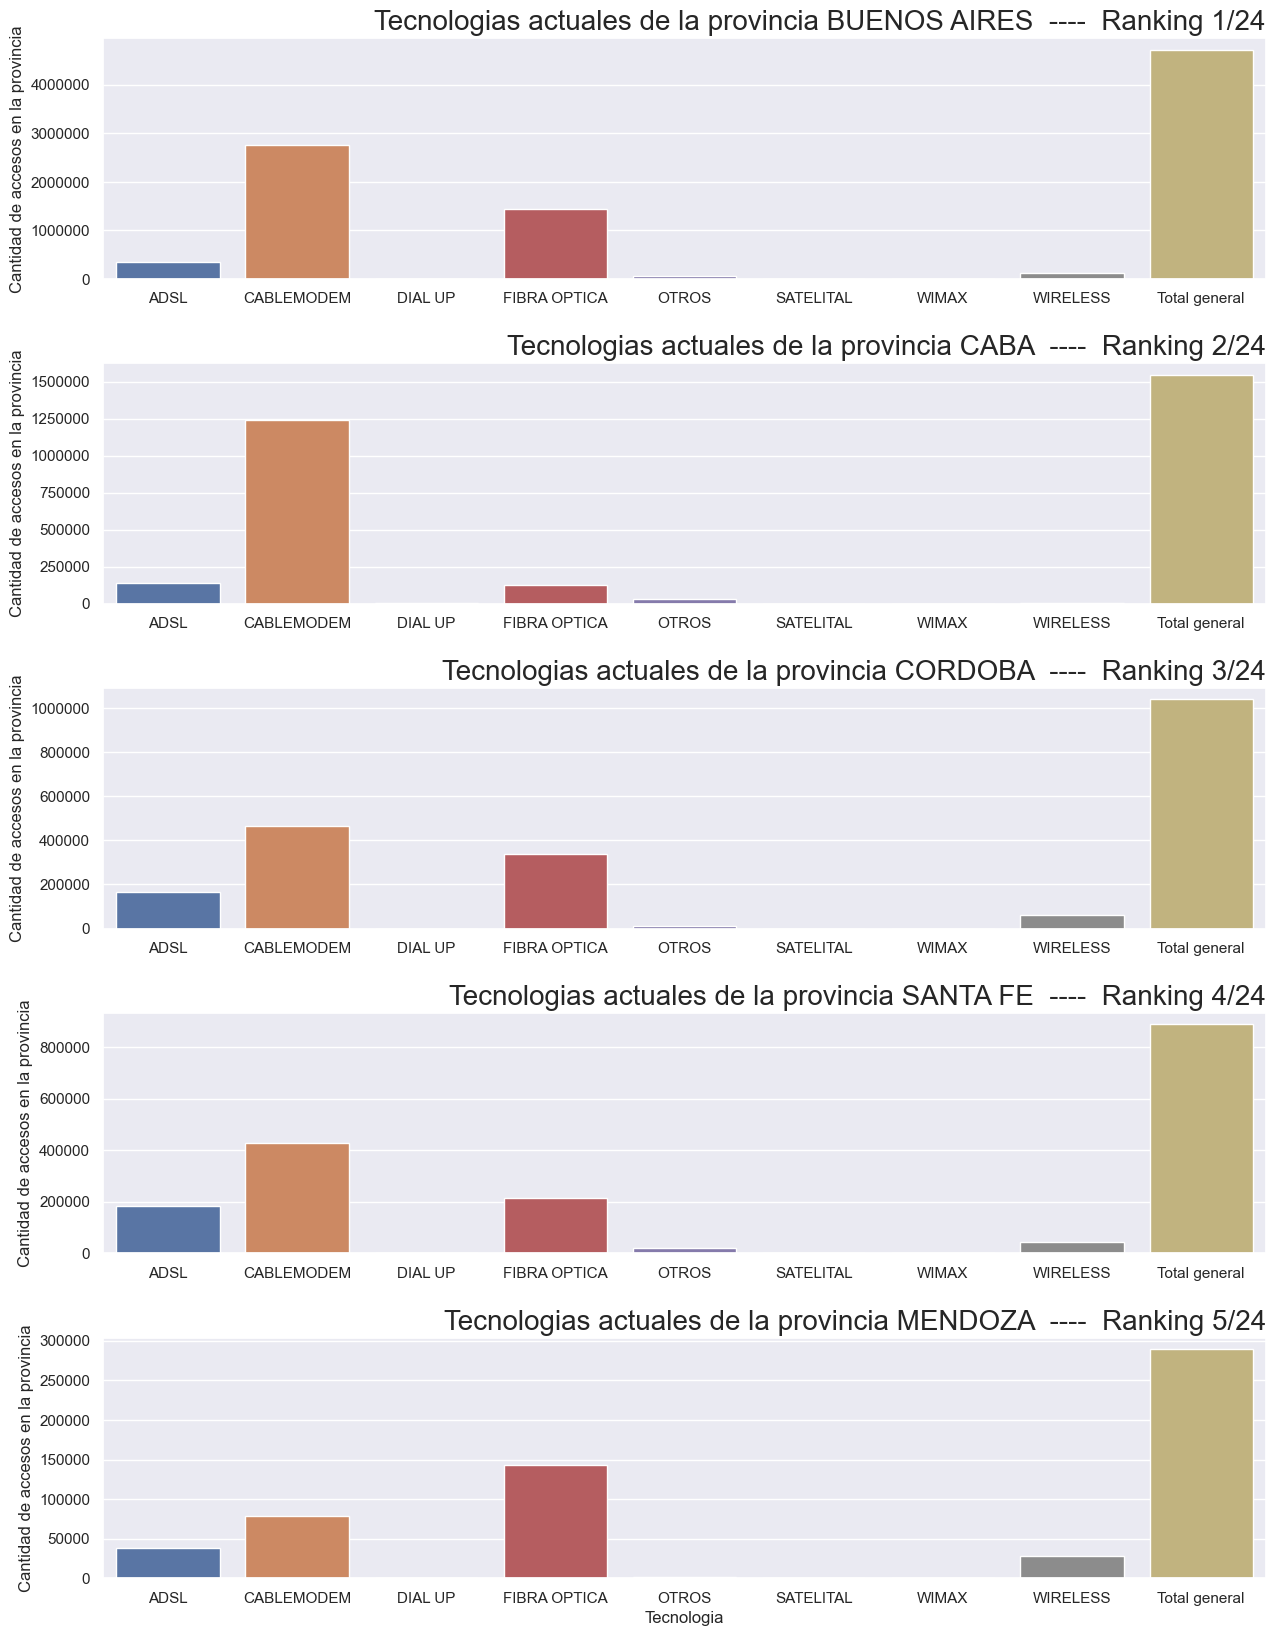

In [332]:
# Las cinco provincias con mas accesos en todo el pais
provincias = data_internet_tecnologia_localidades.sort_values(by='Total general', ascending=False).Provincia.unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,20))
for index in range(5):
    sns.barplot(ax=axes[index], data = data_internet_tecnologia_localidades[data_internet_tecnologia_localidades.Provincia == provincias[index]])
    axes[index].set_title(f'Tecnologias actuales de la provincia {provincias[index]}  ----  Ranking {provincias.tolist().index(provincias[index]) + 1}/24', fontsize=20, loc='right')
    axes[index].ticklabel_format(style='plain',axis='y')
    axes[index].set_xlabel('')
    axes[index].set_ylabel('Cantidad de accesos en la provincia', fontsize=12)

axes[4].set_xlabel('Tecnologia', fontsize=12)

plt.subplots_adjust(hspace=0.35)

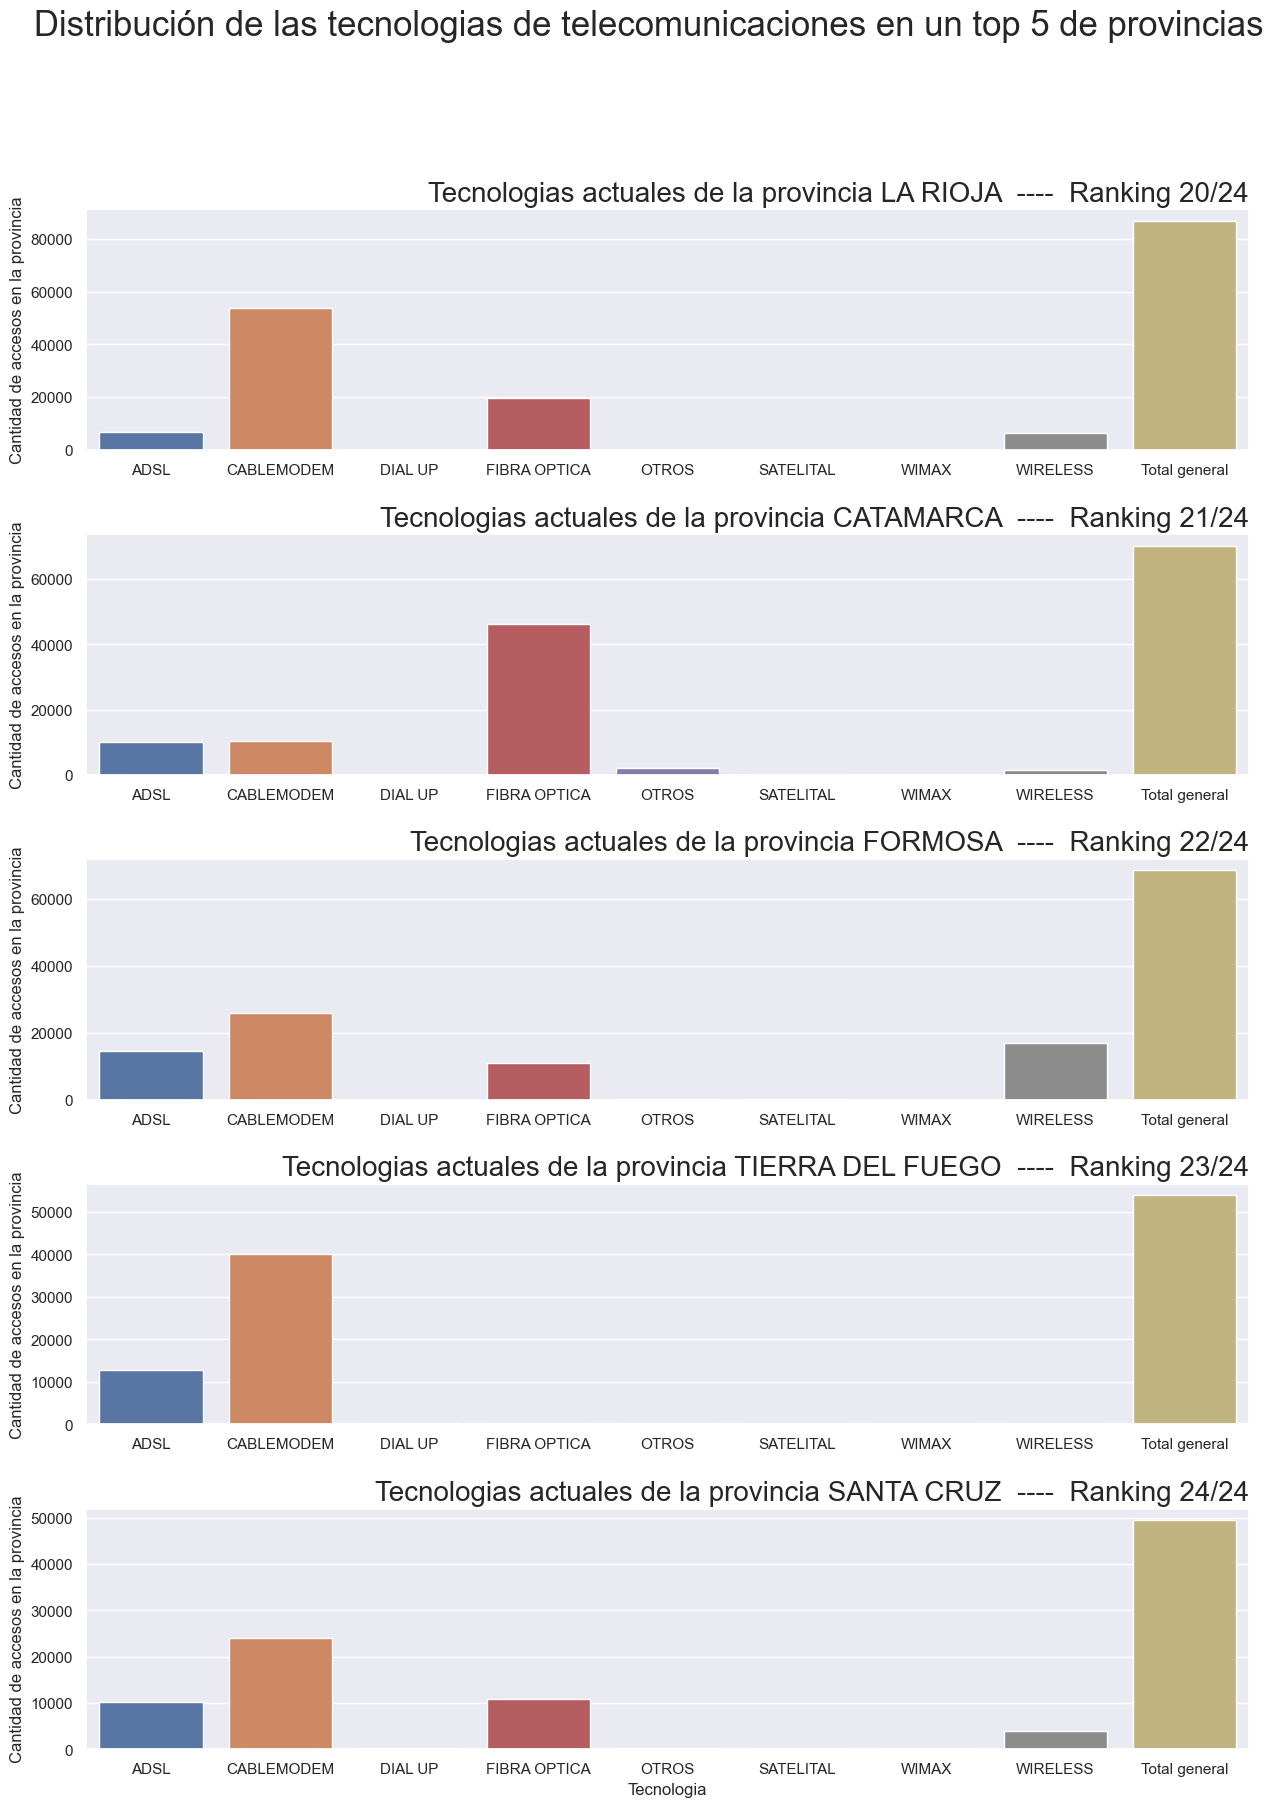

In [343]:
# Las cinco provincias con mas accesos en todo el pais
provincias = data_internet_tecnologia_localidades.sort_values(by='Total general', ascending=False).Provincia.unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,20))
for index in range(-5,0):
    sns.barplot(ax=axes[index], data = data_internet_tecnologia_localidades[data_internet_tecnologia_localidades.Provincia == provincias[index]])
    axes[index].set_title(f'Tecnologias actuales de la provincia {provincias[index]}  ----  Ranking {provincias.tolist().index(provincias[index]) + 1}/24', fontsize=20, loc='right')
    axes[index].ticklabel_format(style='plain',axis='y')
    axes[index].set_xlabel('')
    axes[index].set_ylabel('Cantidad de accesos en la provincia', fontsize=12)

axes[4].set_xlabel('Tecnologia', fontsize=12)
plt.subplots_adjust(hspace=0.35)
fig.suptitle('Distribución de las tecnologias de telecomunicaciones en un top 5 de provincias', fontsize=25)
plt.show()

---

### Dataset `velocidad_bajada_localidades.csv`

In [51]:
df = pd.read_csv('clean_datasets/velocidad_bajada_localidades.csv')
df.sample(3)

Provincia         Partido                 Localidad Link Indec  \
319   BUENOS AIRES       Ituzaingó  Villa Gobernador Udaondo    6410010   
170   BUENOS AIRES  Coronel Suárez                    Pasman    6203060   
2863      SANTA FE      San Martín                     Casas   82126030   

      Otros  0,256 mbps  0,375 mbps  0,5 mbps  0,512 mbps  0,625 mbps  ...  \
319       0           0           0         0           0           0  ...   
170       0           0           0         0           0           0  ...   
2863      0           0           0         0           0           0  ...   

      75 mbps  78 mbps  80 mbps  82 mbps  83 mbps  85 mbps  90 mbps  92 mbps  \
319       507        0        0        0        0        0        0        0   
170         0        0        0        0        0        0        0        0   
2863        0        0        0        0        0        0        0        0   

      95 mbps  100 mbps  
319         0         2  
170         0         0  
2863        0         0  

[3 rows x 83 columns]

In [52]:
data = df.groupby(by='Provincia').sum().reset_index()
data.sample(4)

Provincia  Otros  0,256 mbps  0,375 mbps  0,5 mbps  0,512 mbps  \
1           CABA    565          31           0       451          35   
17      SAN JUAN   1815           0           0        21           3   
5        CORDOBA   4071           2           0        87          10   
0   BUENOS AIRES   8800          19           0       965         192   

    0,625 mbps  0,75 mbps  1 mbps  1,25 mbps  ...  75 mbps  78 mbps  80 mbps  \
1            0          1       5          0  ...       30        0        8   
17           0        723    1304          0  ...        0        0        0   
5            0         83    5656          0  ...       12        0        0   
0            0       4611   18747          0  ...    57048        2      223   

    82 mbps  83 mbps  85 mbps  90 mbps  92 mbps  95 mbps  100 mbps  
1         0        0        0        0        0        0       490  
17        0        0        0        0        0        0       400  
5         0        0        0        0        0        0      6577  
0         0        1       14        3        3        0     46562  

[4 rows x 80 columns]

In [53]:
df_melted = pd.melt(data, id_vars='Provincia')

In [54]:
df_melted[df_melted.Provincia == 'CORDOBA']

Provincia    variable  value
5      CORDOBA       Otros   4071
29     CORDOBA  0,256 mbps      2
53     CORDOBA  0,375 mbps      0
77     CORDOBA    0,5 mbps     87
101    CORDOBA  0,512 mbps     10
...        ...         ...    ...
1781   CORDOBA     85 mbps      0
1805   CORDOBA     90 mbps      0
1829   CORDOBA     92 mbps      0
1853   CORDOBA     95 mbps      0
1877   CORDOBA    100 mbps   6577

[79 rows x 3 columns]

Quiero crear una columna que represente los `mbps` en un valor numerico para poder setearlo en el eje x del grafico

In [55]:
df_melted['Mbps'] = pd.to_numeric(df_melted['variable'].astype(str).str.strip(' mbps').str.replace(',','.'), errors = 'coerce').astype(float)
# df_melted['Mbps'] = df_melted['Mbps'].fillna(-1) # Asigno los valores 'Otros' a -1

Obtengo un promedio ponderado por cada provincia para ver la media de bajada de cada provincia

In [56]:
df_provincia = df_melted[df_melted.Provincia == 'TIERRA DEL FUEGO'].dropna(subset='Mbps')

promedio_ponderado = (df_provincia.value * df_provincia.Mbps).sum() / df_provincia.value.sum()
promedio_ponderado

19.635250873515023

In [57]:
promedios_mbps_provincias = {
    'Provincia':[],
    'Promedio de Mbps':[]
}

for prov in df_melted.Provincia.unique():
    df_provincia = df_melted[df_melted.Provincia == prov].dropna(subset='Mbps')
    promedio_ponderado = (df_provincia.value * df_provincia.Mbps).sum() / df_provincia.value.sum()
    promedios_mbps_provincias['Provincia'].append(prov)
    promedios_mbps_provincias['Promedio de Mbps'].append(promedio_ponderado)

df_promedios = pd.DataFrame(promedios_mbps_provincias)

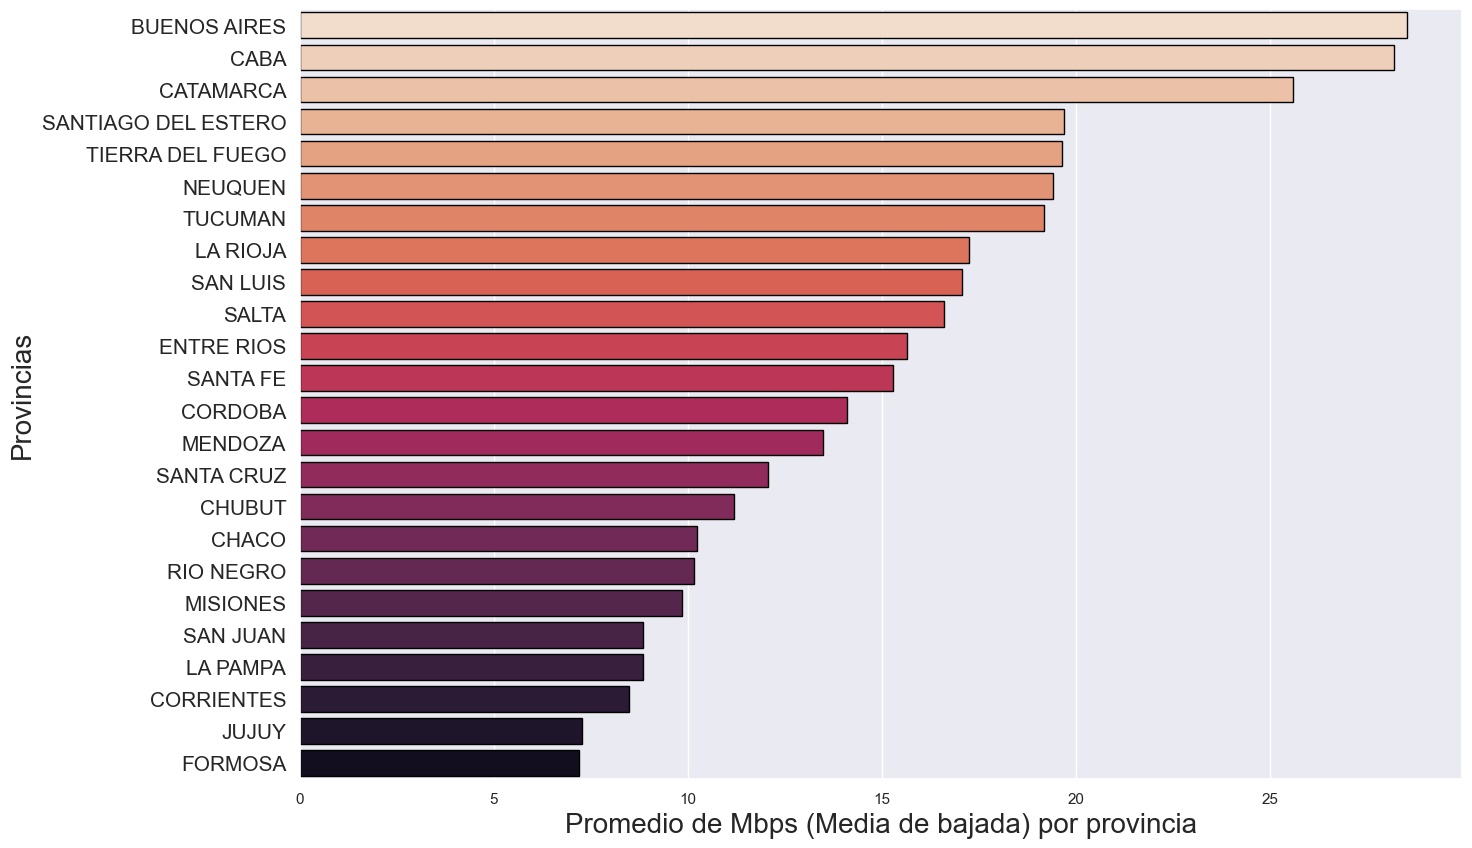

In [58]:
plt.figure(figsize=(15,10))
sns.barplot(data = df_promedios.sort_values(by='Promedio de Mbps', ascending=False), y='Provincia', x='Promedio de Mbps', palette='rocket_r', edgecolor='black')
plt.yticks(fontsize=15)
plt.xlabel('Promedio de Mbps (Media de bajada) por provincia', fontsize=20)
plt.ylabel('Provincias', fontsize=20)
plt.show()

La idea de este grafico es representar en colores mas oscuros las provincias que tienen una menor velocidad promedio de Mbps de internet, caso contrario las provincias con una velocidad de internet alta tienen colores suaves

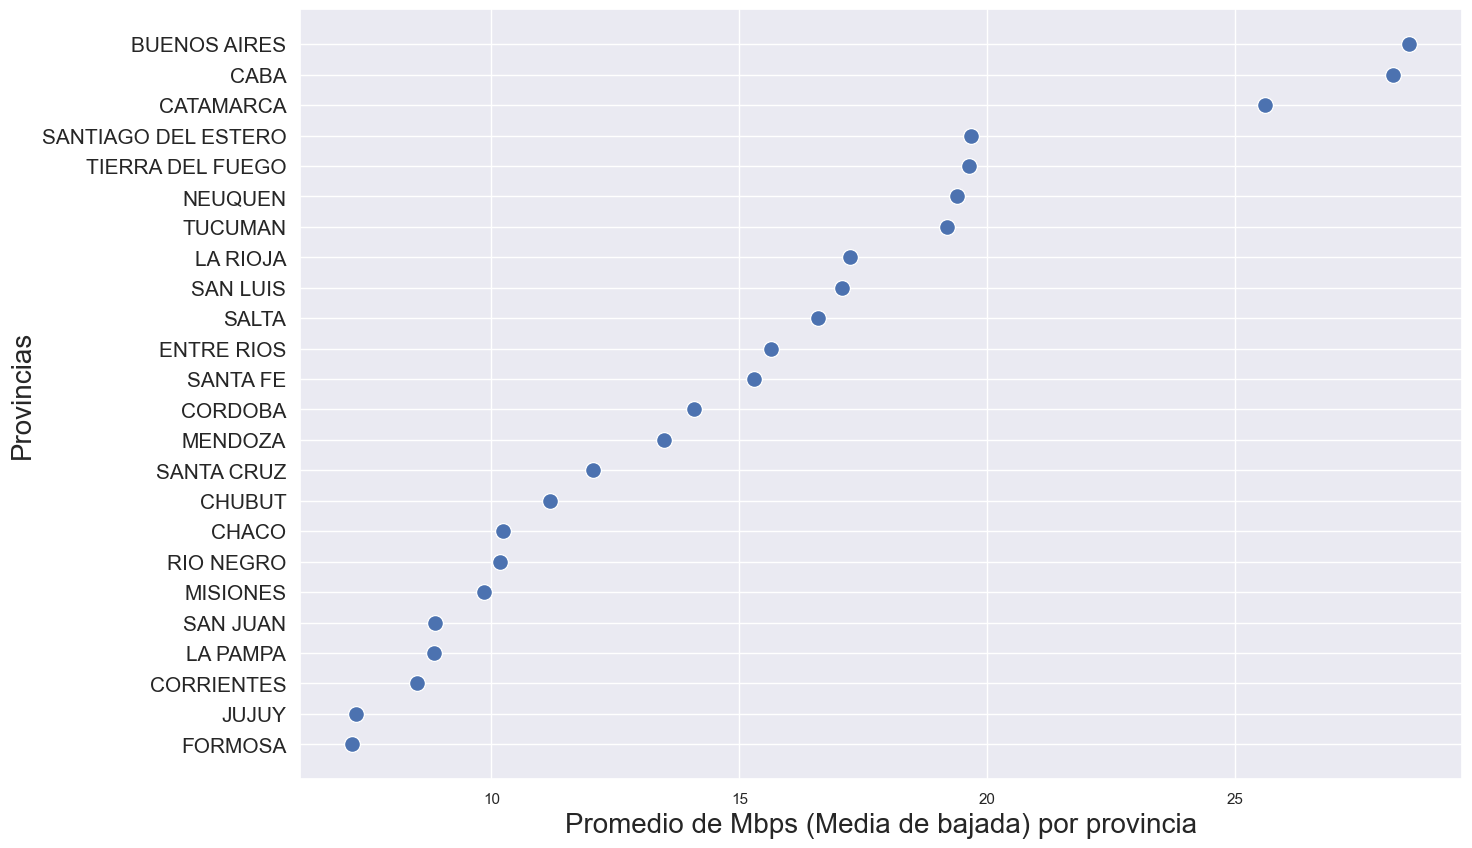

In [59]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = df_promedios.sort_values(by='Promedio de Mbps', ascending=False), y='Provincia', x='Promedio de Mbps', s=130)
plt.yticks(fontsize=15)
plt.xlabel('Promedio de Mbps (Media de bajada) por provincia', fontsize=20)
plt.ylabel('Provincias', fontsize=20)
plt.show()

Veo las velocidades de Internet de una provincia en especifico

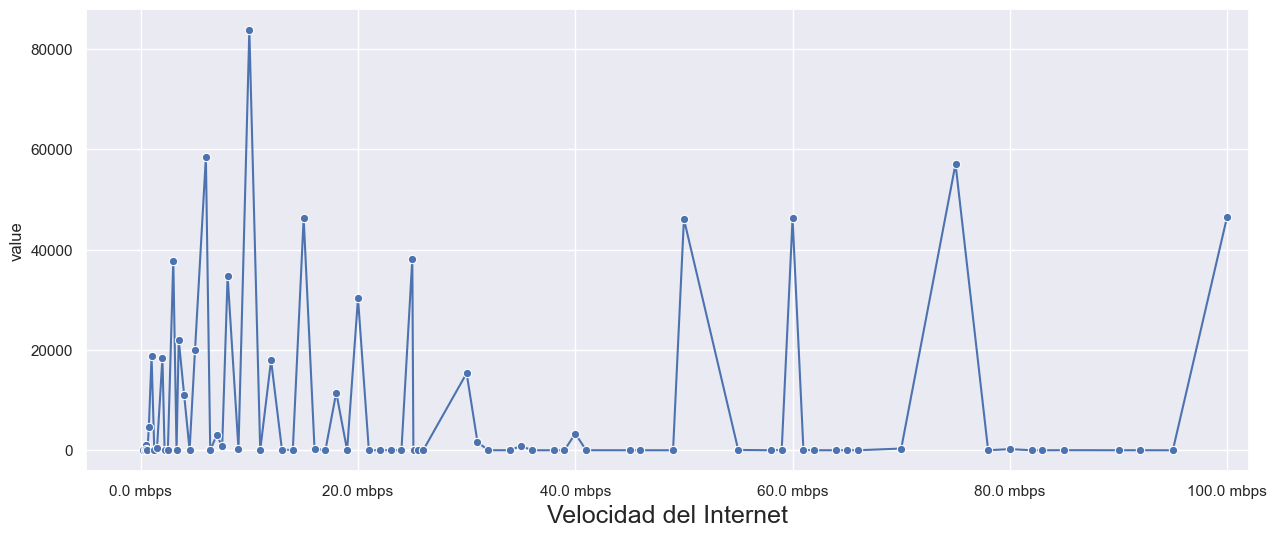

In [60]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df_melted[df_melted.Provincia == 'BUENOS AIRES'], x='Mbps', y='value', marker='o')
plt.xticks(plt.xticks()[0], labels= [f'{tick} mbps' for tick in plt.xticks()[0]])
plt.xlabel('Velocidad del Internet', fontsize=18)
plt.xlim(-5,102)
plt.show()

---

### Dataset `accesos_por_hogares_provincias_trimestral.csv`

In [62]:
accesos_hogares_provincias = pd.read_csv('clean_datasets/accesos_por_hogares_provincias_trimestral.csv')
accesos_hogares_provincias

Año  Trimestre            Provincia  Accesos por cada 100 hogares
0    2022          3         Buenos Aires                         78.11
1    2022          3      Capital Federal                        122.28
2    2022          3            Catamarca                         65.33
3    2022          3                Chaco                         43.86
4    2022          3               Chubut                         84.38
..    ...        ...                  ...                           ...
835  2014          1           Santa Cruz                         28.94
836  2014          1             Santa Fe                         47.85
837  2014          1  Santiago Del Estero                         16.31
838  2014          1     Tierra Del Fuego                         63.97
839  2014          1              Tucumán                         33.42

[840 rows x 4 columns]

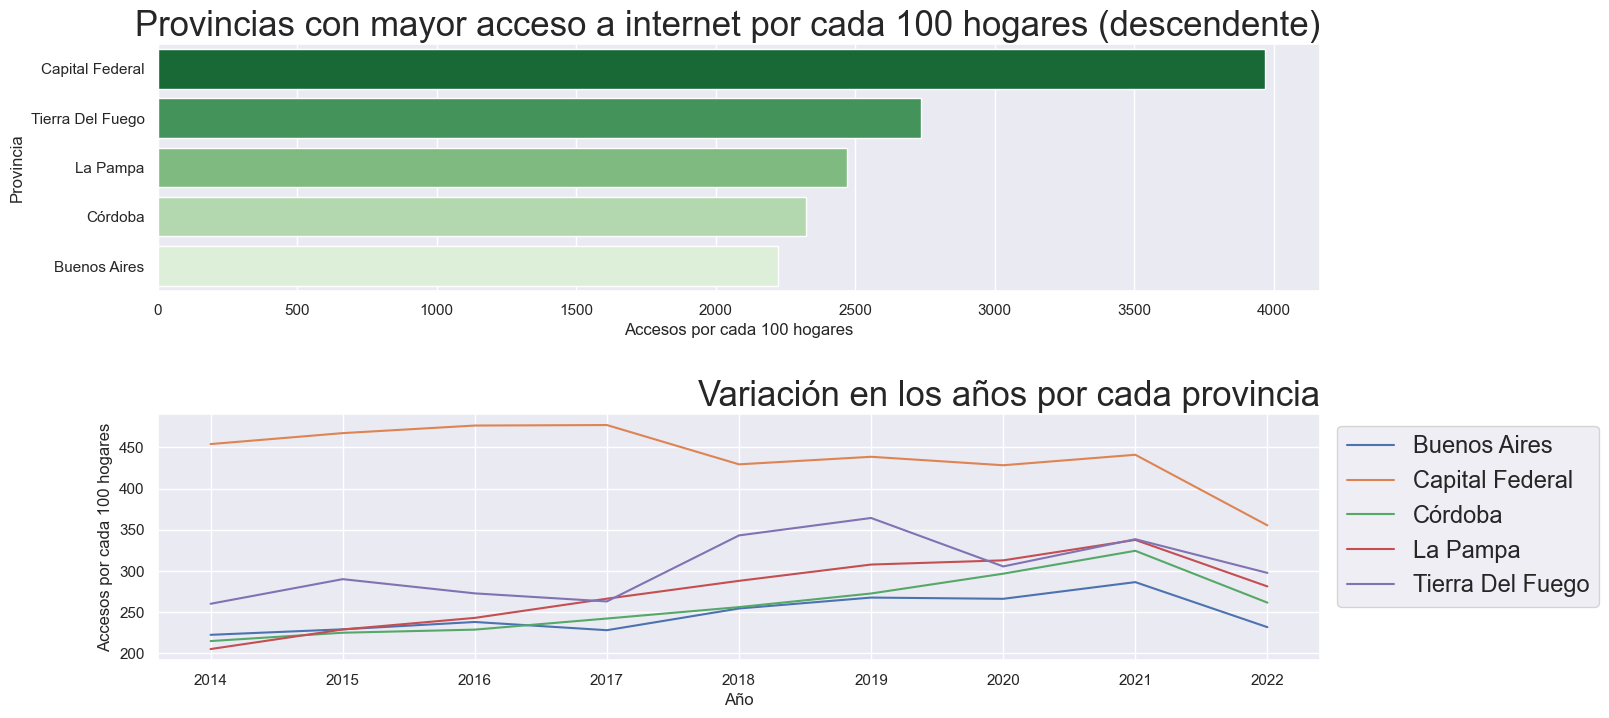

In [63]:
data_hogares = accesos_hogares_provincias.groupby(by=['Provincia']).sum().reset_index() # Grafico 1
data = accesos_hogares_provincias.groupby(by=['Año','Provincia']).sum().reset_index() # Grafico 2

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
# Mejores provincias
sns.barplot(ax=axes[0],
            data = data_hogares.sort_values(by='Accesos por cada 100 hogares', ascending=False)[:5],
            y='Provincia',
            x='Accesos por cada 100 hogares',
            palette='Greens_r')
axes[0].set_title('Provincias con mayor acceso a internet por cada 100 hogares (descendente)', fontsize=25, loc='right')


sns.lineplot(ax=axes[1],
            data = data[data.Provincia.isin(data_hogares.sort_values(by='Accesos por cada 100 hogares',
            ascending=False)[:5]['Provincia'].unique())], 
            x='Año', 
            y='Accesos por cada 100 hogares', 
            hue='Provincia',
            linewidth=1.5)
axes[1].set_title('Variación en los años por cada provincia', fontsize=25, loc='right')
axes[1].legend(fontsize=17, loc='upper right', ncol=1, bbox_to_anchor=(1.25,1))
plt.subplots_adjust(hspace=0.5)

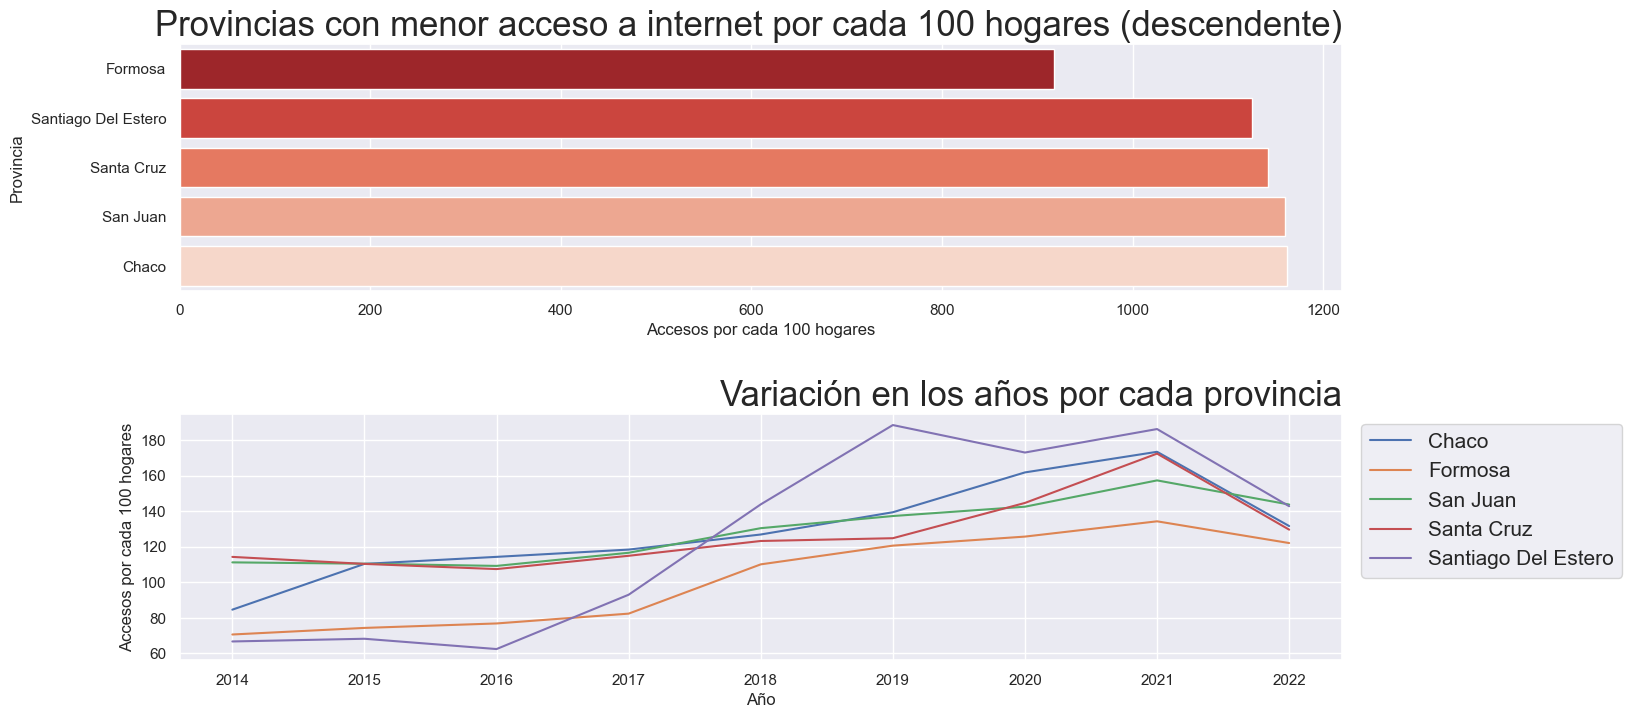

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))

# Peores provincias
sns.barplot(ax=axes[0],
            data = data_hogares.sort_values(by='Accesos por cada 100 hogares', ascending=True)[:5],
            y='Provincia',
            x='Accesos por cada 100 hogares',
            palette='Reds_r')
axes[0].set_title('Provincias con menor acceso a internet por cada 100 hogares (descendente)', fontsize=25, loc='right')


sns.lineplot(ax=axes[1],
            data = data[data.Provincia.isin(data_hogares.sort_values(by='Accesos por cada 100 hogares',
            ascending=True)[:5]['Provincia'].unique())], 
            x='Año', 
            y='Accesos por cada 100 hogares', 
            hue='Provincia',
            linewidth=1.5)
axes[1].set_title('Variación en los años por cada provincia', fontsize=25, loc='right')
axes[1].legend(fontsize=15, loc='upper right', ncol=1, bbox_to_anchor=(1.25,1))
plt.subplots_adjust(hspace=0.5)

---

### Dataset `ingresos_internet_trimestral.csv`

In [65]:
ingresos_internet_trimestral = pd.read_csv('clean_datasets/ingresos_internet_trimestral.csv')
ingresos_internet_trimestral

Año  Trimestre  Ingresos (miles de pesos)        Periodo
0   2022          3                  67055.930  Jul-Sept 2022
1   2022          2                  60335.724   Abr-Jun 2022
2   2022          1                  55589.997   Ene-Mar 2022
3   2021          4                  45467.887   Oct-Dic 2021
4   2021          3                  42999.944  Jul-Sept 2021
5   2021          2                  38239.667   Abr-Jun 2021
6   2021          1                  36676.371   Ene-Mar 2021
7   2020          4                  33539.703   Oct-Dic 2020
8   2020          3                  31997.445  Jul-Sept 2020
9   2020          2                  32102.476   Abr-Jun 2020
10  2020          1                  29946.216   Ene-Mar 2020
11  2019          4                  24169.251   Oct-Dic 2019
12  2019          3                  21652.748  Jul-Sept 2019
13  2019          2                  20743.118   Abr-Jun 2019
14  2019          1                  20207.414   Ene-Mar 2019
15  2018          4                  16637.687   Oct-Dic 2018
16  2018          3                  15410.981  Jul-Sept 2018
17  2018          2                  14319.467   Abr-Jun 2018
18  2018          1                  13171.459   Ene-Mar 2018
19  2017          4                  11226.127   Oct-Dic 2017
20  2017          3                  10065.998  Jul-Sept 2017
21  2017          2                   9786.700   Abr-Jun 2017
22  2017          1                   8012.100   Ene-Mar 2017
23  2016          4                   7839.000   Oct-Dic 2016
24  2016          3                   6124.200  Jul-Sept 2016
25  2016          2                   6342.100   Abr-Jun 2016
26  2016          1                   5368.500   Ene-Mar 2016
27  2015          4                   5768.900   Oct-Dic 2015
28  2015          3                   5537.900  Jul-Sept 2015
29  2015          2                   4017.100   Abr-Jun 2015
30  2015          1                   4763.500   Ene-Mar 2015
31  2014          4                   3504.100   Oct-Dic 2014
32  2014          3                   3786.800  Jul-Sept 2014
33  2014          2                   3708.600   Abr-Jun 2014
34  2014          1                   2840.400   Ene-Mar 2014

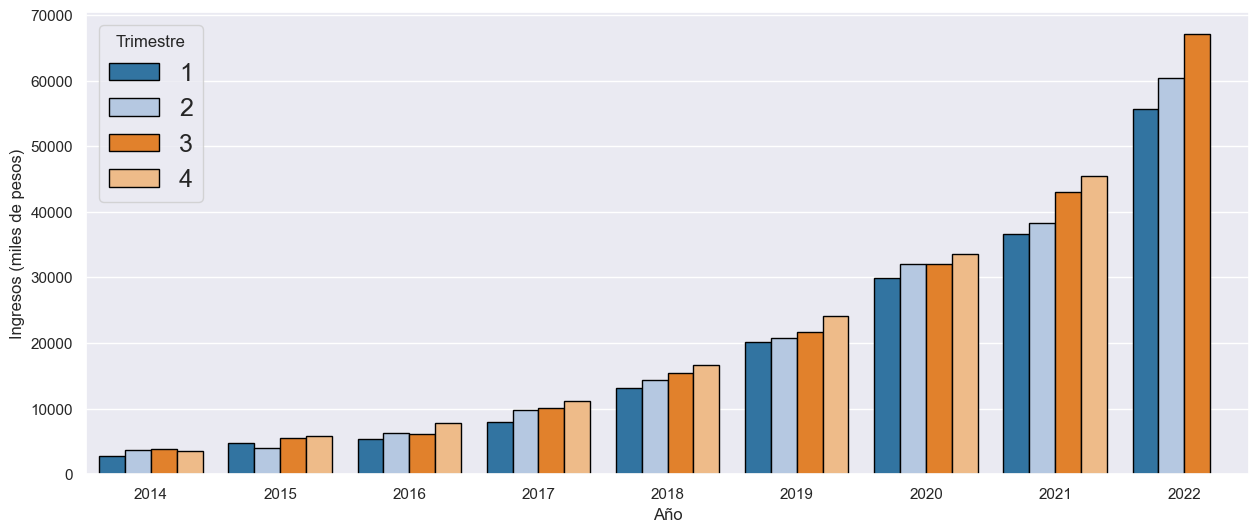

In [66]:
plt.figure(figsize=(15,6))
sns.barplot(data = ingresos_internet_trimestral, x='Año', y='Ingresos (miles de pesos)', hue='Trimestre', palette='tab20', edgecolor='black')
plt.legend(title='Trimestre',fontsize=18)

Voy a comparar cuales fueron los ingresos 

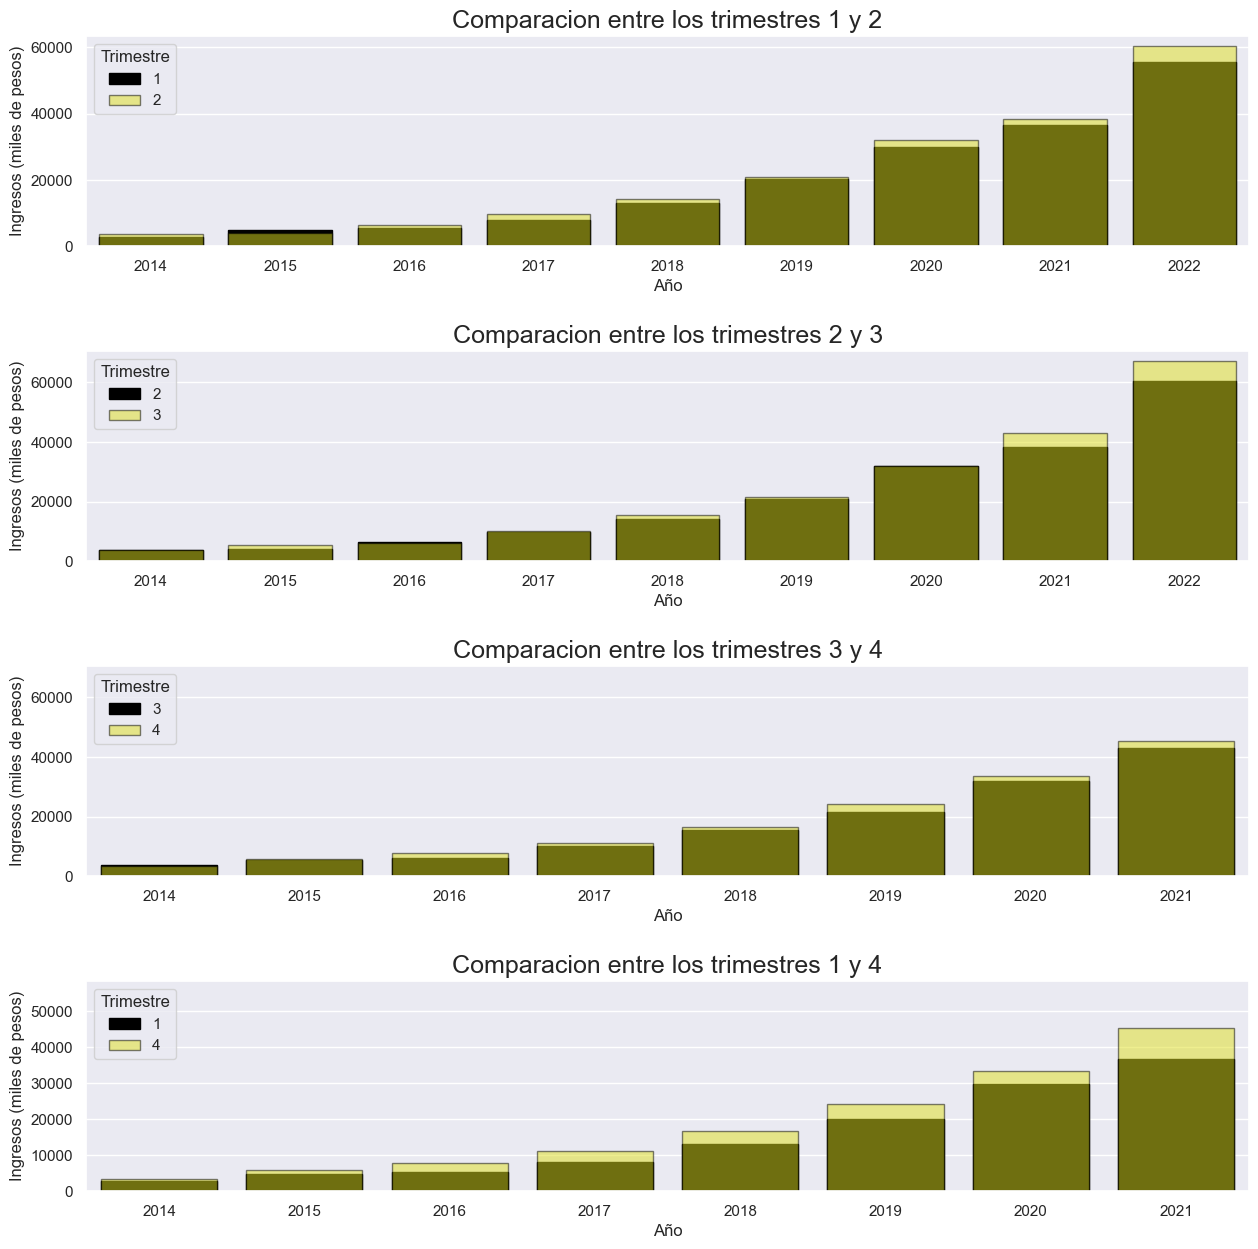

In [67]:
fig, axes = plt.subplots(nrows=4,ncols = 1, figsize=(15,15))
sns.barplot(ax=axes[0],data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 1], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=1, edgecolor='black', palette=['black'])
sns.barplot(ax=axes[0], data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 2], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=0.5,edgecolor='black', palette=['yellow'] )
axes[0].set_title('Comparacion entre los trimestres 1 y 2', fontsize=18)

sns.barplot(ax=axes[1],data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 2], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=1, edgecolor='black', palette=['black'])
sns.barplot(ax=axes[1], data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 3], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=0.5,edgecolor='black', palette=['yellow'] )
axes[1].set_title('Comparacion entre los trimestres 2 y 3', fontsize=18)

sns.barplot(ax=axes[2],data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 3], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=1, edgecolor='black', palette=['black'])
sns.barplot(ax=axes[2], data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 4], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=0.5,edgecolor='black', palette=['yellow'] )
axes[2].set_title('Comparacion entre los trimestres 3 y 4', fontsize=18)

sns.barplot(ax=axes[3],data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 1], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=1, edgecolor='black', palette=['black'])
sns.barplot(ax=axes[3], data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 4], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=0.5,edgecolor='black', palette=['yellow'])
axes[3].set_title('Comparacion entre los trimestres 1 y 4', fontsize=18)

plt.subplots_adjust(hspace=0.5)

---

### Dataset `mbps_pais_trimestral.csv`

In [120]:
mbps_pais_trimestral = pd.read_csv('clean_datasets/mbps_pais_trimestral.csv')
mbps_pais_trimestral.groupby(by=['Año','Trimestre']).mean()[:10]

Mbps (Media de bajada)
Año  Trimestre                        
2014 1                            3.62
     2                            3.76
     3                            3.87
     4                            4.16
2015 1                            4.35
     2                            4.55
     3                            4.79
     4                            4.99
2016 1                            5.08
     2                            5.42

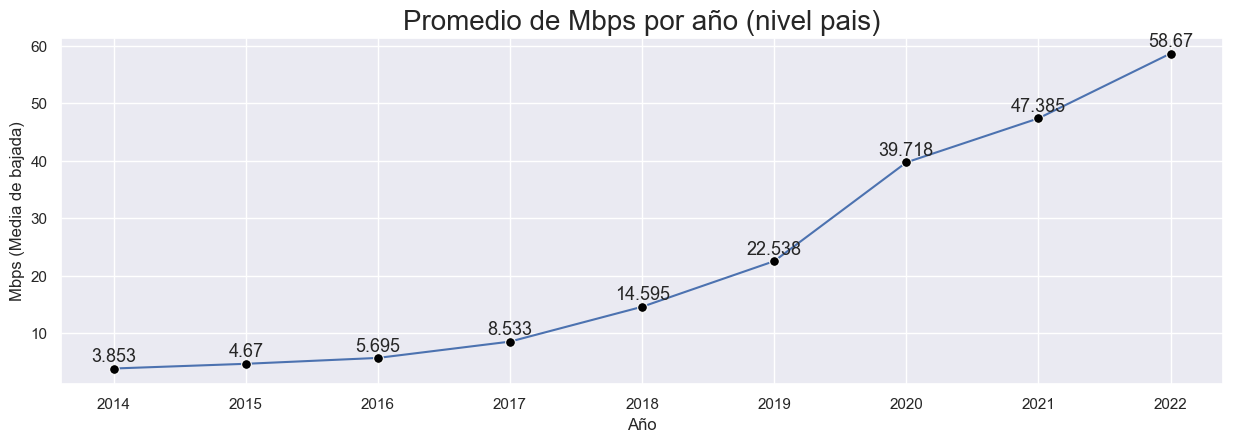

In [113]:
plt.figure(figsize=(15,4.5))
sns.lineplot(data = mbps_pais_trimestral.groupby(by='Año').mean(), y='Mbps (Media de bajada)', x='Año', palette='flare', marker='o', markerfacecolor='black', markersize=7)

# Agregar los valores al lado de los marcadores
for x, y in zip(mbps_pais_trimestral.groupby(by='Año').mean().reset_index()['Año'], mbps_pais_trimestral.groupby(by='Año').mean().reset_index()['Mbps (Media de bajada)']):
    plt.annotate(f'{round(y,3)}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=13)

plt.title('Promedio de Mbps por año (nivel pais)', fontsize=20)
plt.show()

---

### Dataset `servicios_localidades_partido.csv`

In [134]:
servicios_localidades = pd.read_csv('clean_datasets/servicios_localidades_partido.csv')
servicios_localidades

Provincia       Partido        Localidad ADSL DIALUP FIBRAOPTICA  \
0              NaN  Bahía Blanca    Villa Bordeau  NaN     No          No   
1     BUENOS AIRES           NaN     Villa Espora   No    NaN          No   
2     BUENOS AIRES           NaN              NaN   Si    NaN         NaN   
3     BUENOS AIRES      Balcarce              NaN   No     No         NaN   
4     BUENOS AIRES           NaN        Napaleofú   No    NaN          Si   
...            ...           ...              ...  ...    ...         ...   
4307           NaN     Quitilipi        Quitilipi   Si     No          Si   
4308           NaN     Quitilipi  Villa El Palmar  NaN     No          No   
4309         CHACO  San Fernando              NaN   Si     No         NaN   
4310         CHACO           NaN              NaN   Si    NaN         NaN   
4311         CHACO  San Fernando  Colonia Baranda  NaN     No          No   

       4G TELEFONIAFIJA SATELITAL  
0     NaN            No        No  
1      No           NaN       NaN  
2      Si           NaN       NaN  
3      No            Si        No  
4      Si           NaN        No  
...   ...           ...       ...  
4307   Si            Si        No  
4308  NaN            No        No  
4309   Si            Si       NaN  
4310   Si           NaN       NaN  
4311  NaN            No        No  

[4312 rows x 9 columns]

In [147]:
# from pandas_profiling import ProfileReport

# ProfileReport(servicios_localidades)

---

### Dataset `velocidad_bajada_provincias.csv`

In [194]:
velocidad_bajada_provincias = pd.read_csv('clean_datasets/velocidad_bajada_provincias.csv')
velocidad_bajada_provincias.sample(5)

Año  Trimestre     Provincia   Otros  0,256 Mbps  0,375 Mbps  \
5    2022          3       Córdoba   13873           2           0   
408  2018          2  Buenos Aires  111742           0           0   
319  2019          2    Entre Ríos   17206           0           0   
447  2018          1     Río Negro    3975           0           0   
293  2019          3       Córdoba    8065           2           0   

     0,625 Mbps  0,5 Mbps  0,512 Mbps  0,75 Mbps  ...  70 Mbps  71 Mbps  \
5             0        87          10         83  ...        2        0   
408           0      1009           0      33052  ...        2        0   
319           0        18           0          0  ...        0        0   
447           0       409           0        197  ...        0        0   
293           0        81           0          0  ...        3        0   

     75 Mbps  77 Mbps  78 Mbps  80 Mbps  81 Mbps  83 Mbps  82 Mbps  86 Mbps  
5         12        0        0        0        0        0        0        0  
408        0        0        0        0        0        0        0        0  
319        0        0        0        0        0        0        0        0  
447        0        0        0        0        0        0        0        0  
293        1        0        0        6        0        0        0        0  

[5 rows x 97 columns]

In [195]:
data_vel_bajada = velocidad_bajada_provincias.groupby(by=['Provincia', 'Año']).sum().reset_index()

In [196]:
data_vel_bajada = pd.melt(data_vel_bajada, id_vars=['Año','Provincia','Trimestre'])
data_vel_bajada['Mbps'] = data_vel_bajada.variable.str.strip(' Mbps').str.replace(',','.')
data_vel_bajada['Mbps'] = data_vel_bajada['Mbps'].str.replace('Otro','-0.0')
data_vel_bajada['Mbps'] = data_vel_bajada['Mbps'].astype(float)

In [197]:
data_vel_bajada

Año     Provincia  Trimestre variable   value  Mbps
0      2017  Buenos Aires          4    Otros  114182  -0.0
1      2018  Buenos Aires         10    Otros  357672  -0.0
2      2019  Buenos Aires         10    Otros  101327  -0.0
3      2020  Buenos Aires         10    Otros   79037  -0.0
4      2021  Buenos Aires         10    Otros   52661  -0.0
...     ...           ...        ...      ...     ...   ...
13531  2018       Tucumán         10  86 Mbps       0  86.0
13532  2019       Tucumán         10  86 Mbps       0  86.0
13533  2020       Tucumán         10  86 Mbps       0  86.0
13534  2021       Tucumán         10  86 Mbps       0  86.0
13535  2022       Tucumán          6  86 Mbps       0  86.0

[13536 rows x 6 columns]

In [239]:
data = {y:[] for y in data_vel_bajada.Año.unique()}
data['Provincia'] = []

for prov in data_vel_bajada.Provincia.unique():
    for year in data_vel_bajada.Año.unique():
        df_provincia = data_vel_bajada[(data_vel_bajada.Provincia == prov) | (data_vel_bajada.Año == year)]
        promedio_ponderado = (df_provincia.value * df_provincia.Mbps).sum() / df_provincia.value.sum()
        data[year].append(promedio_ponderado)
    data['Provincia'].append(prov)

In [240]:
data = pd.DataFrame(data)

In [241]:
data = pd.melt(data, id_vars='Provincia', var_name='Año' ,value_name='Mbps promedio')

In [242]:
data

Provincia   Año  Mbps promedio
0           Buenos Aires  2017      22.534493
1        Capital Federal  2017      24.122704
2              Catamarca  2017      11.956343
3                  Chaco  2017      12.858012
4                 Chubut  2017      10.472571
..                   ...   ...            ...
139           Santa Cruz  2022      28.329043
140             Santa Fe  2022      24.431989
141  Santiago Del Estero  2022      27.503773
142     Tierra Del Fuego  2022      28.278230
143              Tucumán  2022      27.614604

[144 rows x 3 columns]

<AxesSubplot: xlabel='Año', ylabel='Mbps promedio'>

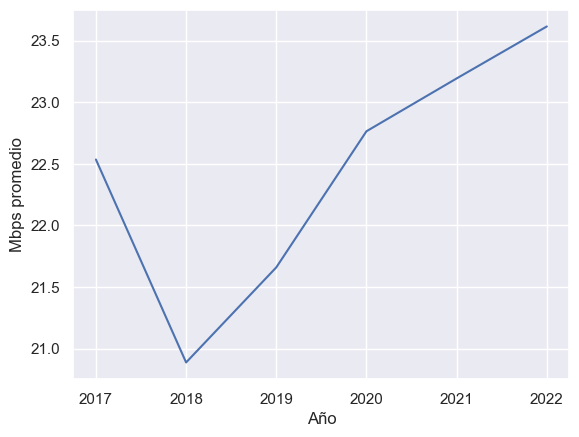

In [245]:
sns.lineplot(data = data[data.Provincia == 'Buenos Aires'], x='Año', y='Mbps promedio')

In [209]:
df_provincia = data_vel_bajada[(data_vel_bajada.Provincia == 'Tierra Del Fuego') | (data_vel_bajada.Año == 2020)]

promedio_ponderado = (df_provincia.value * df_provincia.Mbps).sum() / df_provincia.value.sum()
promedio_ponderado

21.867839588824197